# OTT서비스 데이터셋 : Netflix, Amazon, Disney+, Paramount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



#Netflix

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_n = pd.read_csv('/content/drive/MyDrive/ott/netflix/titles.csv')
df_n['Platform'] = 'NF'
df_n.head()

id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm127384      Monty Python and the Holy Grail  MOVIE   
3   tm70993                        Life of Brian  MOVIE   
4  tm190788                         The Exorcist  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  King Arthur, accompanied by his squire, recrui...          1975   
3  Brian Cohen is an average young Jewish man, bu...          1979   
4  12-year-old Regan MacNeil begins to adapt an e...          1973   

  age_certification  runtime                 genres production_countries  \
0             TV-MA       48      ['documentation']               ['US']   
1                 R      113     ['crime', 'drama']               ['US']   
2                PG       91  ['comedy', 'fantasy']               ['GB']   
3                 R       94             ['comedy']               ['GB']   
4                 R      133             ['horror']               ['US']   

   seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0      1.0        NaN         NaN         NaN            0.600         NaN   
1      NaN  tt0075314         8.3    795222.0           27.612         8.2   
2      NaN  tt0071853         8.2    530877.0           18.216         7.8   
3      NaN  tt0079470         8.0    392419.0           17.505         7.8   
4      NaN  tt0070047         8.1    391942.0           95.337         7.7   

  Platform  
0       NF  
1       NF  
2       NF  
3       NF  
4       NF

In [ ]:
print(df_n.shape)

(5806, 16)


## `Null data` 

In [ ]:
df_n.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
Platform                   0
dtype: int64

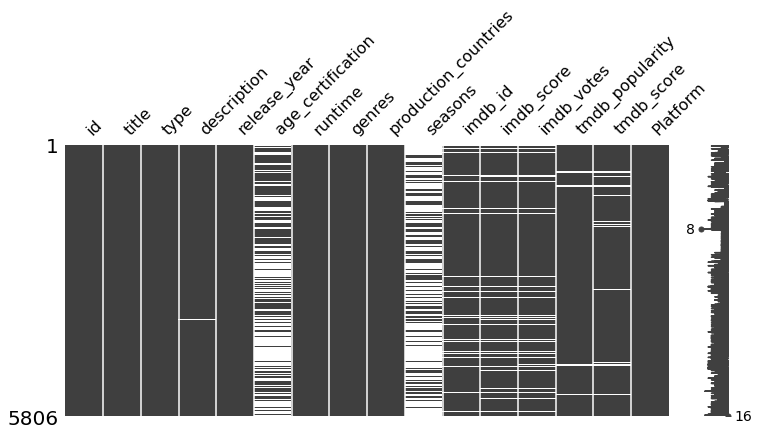

In [ ]:
import missingno as msno
msno.matrix(df_n, figsize=(12,5))

In [ ]:
for i in df_n.columns:
    null_rate=df_n[i].isna().sum() / len(df_n)*100
    if(null_rate>0):
        print("{} null rate : {}%".format(i,round(null_rate,2)))

title null rate : 0.02%
description null rate : 0.31%
age_certification null rate : 44.95%
seasons null rate : 64.74%
imdb_id null rate : 7.65%
imdb_score null rate : 9.01%
imdb_votes null rate : 9.28%
tmdb_popularity null rate : 1.62%
tmdb_score null rate : 5.48%


### `Seasons` 결측치처리

In [ ]:
df_n['seasons'] = df_n['seasons'].fillna(0.0)

### `Description` 결측치처리

In [ ]:
df_n = df_n.dropna(subset = ['description'])

### `IMDB-ID` 결측치처리

In [ ]:
df_n = df_n.drop('imdb_id', axis = 1)

### `Production countries` 결측치 처리

In [ ]:
df_n = df_n[df_n.production_countries != "[]"]

In [ ]:
df_n['age_certification'].value_counts()

TV-MA    823
R        572
TV-14    456
PG-13    437
PG       243
TV-PG    175
G        118
TV-Y7    105
TV-Y      93
TV-G      75
NC-17     14
Name: age_certification, dtype: int64

In [ ]:
ratings_ages = {
     np.nan : 'NaN'
}

In [ ]:
df_n['age_certification'] = df_n['age_certification'].replace(ratings_ages)

In [ ]:
df_n['age_certification'].value_counts()

NaN      2453
TV-MA     823
R         572
TV-14     456
PG-13     437
PG        243
TV-PG     175
G         118
TV-Y7     105
TV-Y       93
TV-G       75
NC-17      14
Name: age_certification, dtype: int64

### `IMDB-SCORE, TMDB-SCORE` 결측치처리

In [ ]:
df_n = df_n.dropna(subset=['imdb_score', 'tmdb_score'], how = 'all')

In [ ]:
genre_null = {
     "[]" : 'NaN'
}

In [ ]:
df_n['genres'] = df_n['genres'].replace(genre_null)

In [ ]:
#0.9, 1.1로 보정계수 삽입
df_n['imdb_score'] = df_n['imdb_score'].fillna(df_n['tmdb_score'] * 0.9)
df_n['tmdb_score'] = df_n['tmdb_score'].fillna(df_n['imdb_score'] * 1.1)

### `IMDB-votes, TMDB-popularity` 결측치처리

In [ ]:
df_n = df_n.dropna(subset=['imdb_votes'])
df_n = df_n.dropna(subset=['tmdb_popularity'])

In [ ]:
df_n.shape

(5062, 15)

# Amazon

In [ ]:
df_a = pd.read_csv('/content/drive/MyDrive/ott/amazon/titles.csv')
df_a['Platform'] = 'AM'
df_a.head()

id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   
3  tm83884              His Girl Friday  MOVIE   
4  tm56584            In a Lonely Place  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist former wife of newspaper...          1940   
4  An aspiring actress begins to suspect that her...          1950   

  age_certification  runtime  \
0             TV-PG       19   
1               NaN       78   
2               NaN      171   
3               NaN       92   
4               NaN       94   

                                              genres production_countries  \
0  ['comedy', 'family', 'animation', 'action', 'f...               ['US']   
1  ['action', 'drama', 'war', 'western', 'comedy'...               ['US']   
2                        ['romance', 'war', 'drama']               ['US']   
3                     ['comedy', 'drama', 'romance']               ['US']   
4                   ['thriller', 'drama', 'romance']               ['US']   

   seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0     26.0  tt0850645         8.6      1092.0           15.424         7.6   
1      NaN  tt0017925         8.2     89766.0            8.647         8.0   
2      NaN  tt0036868         8.1     63026.0            8.435         7.8   
3      NaN  tt0032599         7.8     57835.0           11.270         7.4   
4      NaN  tt0042593         7.9     30924.0            8.273         7.6   

  Platform  
0       AM  
1       AM  
2       AM  
3       AM  
4       AM

In [ ]:
df_a.shape

(9871, 16)

In [ ]:
df_a['seasons'] = df_a['seasons'].fillna(0.0)
df_a = df_a.dropna(subset = ['description'])
df_a = df_a.drop('imdb_id', axis = 1)
df_a = df_a[df_a.production_countries != "[]"]
df_a['age_certification'] = df_a['age_certification'].replace(ratings_ages)
df_a = df_a.dropna(subset=['imdb_score', 'tmdb_score'], how = 'all')
df_a['genres'] = df_a['genres'].replace(genre_null)
df_a['imdb_score'] = df_a['imdb_score'].fillna(df_a['tmdb_score'] * 0.9)
df_a['tmdb_score'] = df_a['tmdb_score'].fillna(df_a['imdb_score'] * 1.1)
df_a = df_a.dropna(subset=['imdb_votes'])
df_a = df_a.dropna(subset=['tmdb_popularity'])

In [ ]:
df_a.shape

(8189, 15)

# Disney

In [ ]:
df_d = pd.read_csv('/content/drive/MyDrive/ott/disney/titles.csv')
df_d['Platform'] = 'DS'
df_d.head()

id                            title   type  \
0  tm74391                         Fantasia  MOVIE   
1  tm67803  Snow White and the Seven Dwarfs  MOVIE   
2  tm82546                        Pinocchio  MOVIE   
3  tm79357                            Bambi  MOVIE   
4  tm62671                  Treasure Island  MOVIE   

                                         description  release_year  \
0  Walt Disney's timeless masterpiece is an extra...          1940   
1  A beautiful girl, Snow White, takes refuge in ...          1937   
2  Lonely toymaker Geppetto has his wishes answer...          1940   
3  Bambi's tale unfolds from season to season as ...          1942   
4  Enchanted by the idea of locating treasure bur...          1950   

  age_certification  runtime  \
0                 G      120   
1                 G       83   
2                 G       88   
3                 G       70   
4                PG       96   

                                              genres production_countries  \
0        ['animation', 'family', 'music', 'fantasy']               ['US']   
1  ['fantasy', 'family', 'romance', 'animation', ...               ['US']   
2       ['animation', 'comedy', 'family', 'fantasy']               ['US']   
3                   ['animation', 'drama', 'family']               ['US']   
4                               ['family', 'action']         ['GB', 'US']   

   seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0      NaN  tt0032455         7.7     94681.0           57.751         7.4   
1      NaN  tt0029583         7.6    195321.0          107.137         7.1   
2      NaN  tt0032910         7.5    141937.0           71.160         7.1   
3      NaN  tt0034492         7.3    140406.0           68.136         7.0   
4      NaN  tt0043067         6.9      8229.0           10.698         6.5   

  Platform  
0       DS  
1       DS  
2       DS  
3       DS  
4       DS

In [ ]:
df_d['seasons'] = df_d['seasons'].fillna(0.0)
df_d = df_d.dropna(subset = ['description'])
df_d = df_d.drop('imdb_id', axis = 1)
df_d = df_d[df_d.production_countries != "[]"]
df_d['age_certification'] = df_d['age_certification'].replace(ratings_ages)
df_d = df_d.dropna(subset=['imdb_score', 'tmdb_score'], how = 'all')
df_d['genres'] = df_d['genres'].replace(genre_null)
df_d['imdb_score'] = df_d['imdb_score'].fillna(df_d['tmdb_score'] * 0.9)
df_d['tmdb_score'] = df_d['tmdb_score'].fillna(df_d['imdb_score'] * 1.1)
df_d = df_d.dropna(subset=['imdb_votes'])
df_d = df_d.dropna(subset=['tmdb_popularity'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
print(df_d.shape)

(1085, 15)


# Paramount

In [ ]:
df_p = pd.read_csv('/content/drive/MyDrive/ott/paramount/titles.csv')
df_p['Platform'] = 'PM'
df_p.head()

id                                             title   type  \
0   tm19248                                       The General  MOVIE   
1   tm83884                                   His Girl Friday  MOVIE   
2   tm19424                                            Detour  MOVIE   
3  tm112005                                         Marihuana  MOVIE   
4   tm22806  Intolerance: Love's Struggle Throughout the Ages  MOVIE   

                                         description  release_year  \
0  During America’s Civil War, Union spies steal ...          1926   
1  Hildy, the journalist former wife of newspaper...          1940   
2  The life of Al Roberts, a pianist in a New Yor...          1945   
3  A young girl named Burma attends a beach party...          1936   
4  The story of a poor young woman, separated by ...          1916   

  age_certification  runtime  \
0               NaN       78   
1               NaN       92   
2               NaN       66   
3               NaN       57   
4               NaN      197   

                                              genres production_countries  \
0  ['action', 'drama', 'war', 'western', 'comedy'...               ['US']   
1                     ['comedy', 'drama', 'romance']               ['US']   
2                     ['thriller', 'drama', 'crime']               ['US']   
3                                 ['crime', 'drama']               ['US']   
4                               ['history', 'drama']               ['US']   

   seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0      NaN  tt0017925         8.2     89766.0            8.647         8.0   
1      NaN  tt0032599         7.8     57835.0           11.270         7.4   
2      NaN  tt0037638         7.3     17233.0            7.757         7.2   
3      NaN  tt0026683         4.0       864.0            3.748         3.6   
4      NaN  tt0006864         7.7     15242.0            9.412         7.2   

  Platform  
0       PM  
1       PM  
2       PM  
3       PM  
4       PM

In [ ]:
df_p['seasons'] = df_p['seasons'].fillna(0.0)
df_p = df_p.dropna(subset = ['description'])
df_p = df_p.drop('imdb_id', axis = 1)
df_p = df_p[df_p.production_countries != "[]"]
df_p['age_certification'] = df_p['age_certification'].replace(ratings_ages)
df_p = df_p.dropna(subset=['imdb_score', 'tmdb_score'], how = 'all')
df_p['genres'] = df_p['genres'].replace(genre_null)
df_p['imdb_score'] = df_p['imdb_score'].fillna(df_p['tmdb_score'] * 0.9)
df_p['tmdb_score'] = df_p['tmdb_score'].fillna(df_p['imdb_score'] * 1.1)
df_p = df_p.dropna(subset=['imdb_votes'])
df_p = df_p.dropna(subset=['tmdb_popularity'])

In [ ]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2544 entries, 0 to 2820
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2544 non-null   object 
 1   title                 2544 non-null   object 
 2   type                  2544 non-null   object 
 3   description           2544 non-null   object 
 4   release_year          2544 non-null   int64  
 5   age_certification     2544 non-null   object 
 6   runtime               2544 non-null   int64  
 7   genres                2544 non-null   object 
 8   production_countries  2544 non-null   object 
 9   seasons               2544 non-null   float64
 10  imdb_score            2544 non-null   float64
 11  imdb_votes            2544 non-null   float64
 12  tmdb_popularity       2544 non-null   float64
 13  tmdb_score            2544 non-null   float64
 14  Platform              2544 non-null   object 
dtypes: float64(5), int64(

# Merge Data

In [ ]:
df_concat = pd.concat([df_n, df_d, df_a, df_p])
df_concat = df_concat.drop_duplicates(['id'], ignore_index=True)

In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15156 entries, 0 to 15155
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15156 non-null  object 
 1   title                 15156 non-null  object 
 2   type                  15156 non-null  object 
 3   description           15156 non-null  object 
 4   release_year          15156 non-null  int64  
 5   age_certification     15156 non-null  object 
 6   runtime               15156 non-null  int64  
 7   genres                15156 non-null  object 
 8   production_countries  15156 non-null  object 
 9   seasons               15156 non-null  float64
 10  imdb_score            15156 non-null  float64
 11  imdb_votes            15156 non-null  float64
 12  tmdb_popularity       15156 non-null  float64
 13  tmdb_score            15156 non-null  float64
 14  Platform              15156 non-null  object 
dtypes: float64(5), int6

In [ ]:
df_concat.tail()

id                                            title   type  \
15151  tm1039489                               Each and Every Day  MOVIE   
15152   tm856614                  Beautiful Something Left Behind  MOVIE   
15153   ts310078  Tha God's Honest Truth with Charlamagne Tha God   SHOW   
15154   tm975981                    Cher & the Loneliest Elephant  MOVIE   
15155   ts305329                        House Calls with Dr. Phil   SHOW   

                                             description  release_year  \
15151  Follow the story of young people who have atte...          2021   
15152  In New Jersey, the Good Grief community focuse...          2021   
15153  Nothing is off limits in this weekly late-nigh...          2021   
15154  "The World's Loneliest Elephant" Kaavan will f...          2021   
15155  The talk show legend travels across the countr...          2021   

      age_certification  runtime                         genres  \
15151               NaN       59              ['documentation']   
15152               NaN       87  ['documentation', 'european']   
15153             TV-14       21                     ['comedy']   
15154               NaN       46              ['documentation']   
15155             TV-14       43                    ['reality']   

           production_countries  seasons  imdb_score  imdb_votes  \
15151                    ['US']      0.0         5.6        22.0   
15152                    ['DK']      0.0         7.5        87.0   
15153                    ['US']      1.0         2.3       580.0   
15154  ['KH', 'PK', 'GB', 'US']      0.0         7.6       237.0   
15155                    ['US']      1.0         5.4        35.0   

       tmdb_popularity  tmdb_score Platform  
15151            1.400        6.16       PM  
15152            1.112        9.00       PM  
15153            3.949        2.53       PM  
15154            1.758        7.00       PM  
15155            0.600        5.94       PM

### `Merge-data` 결측치 제거 확인

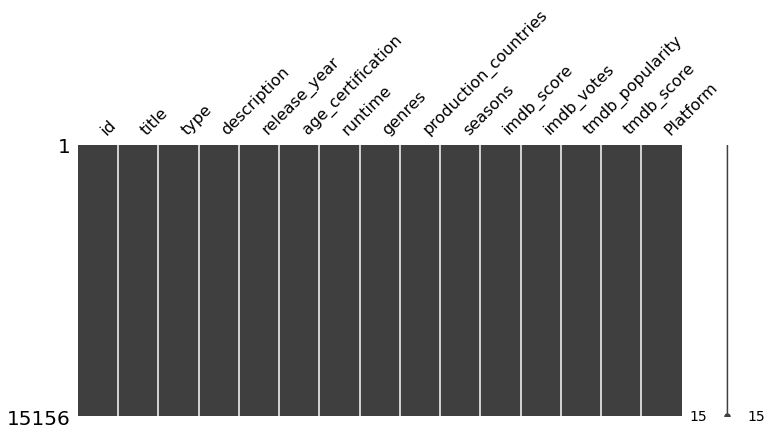

In [ ]:
import missingno as msno
msno.matrix(df_concat, figsize=(12,5))

In [ ]:
for i in df_concat.columns:
    null_rate=df_concat[i].isna().sum() / len(df_concat)*100
    if(null_rate>=0):
        print("{} null rate : {}%".format(i,round(null_rate,2)))

id null rate : 0.0%
title null rate : 0.0%
type null rate : 0.0%
description null rate : 0.0%
release_year null rate : 0.0%
age_certification null rate : 0.0%
runtime null rate : 0.0%
genres null rate : 0.0%
production_countries null rate : 0.0%
seasons null rate : 0.0%
imdb_score null rate : 0.0%
imdb_votes null rate : 0.0%
tmdb_popularity null rate : 0.0%
tmdb_score null rate : 0.0%
Platform null rate : 0.0%


In [ ]:
df_concat.head()

id                            title   type  \
0   tm84618                      Taxi Driver  MOVIE   
1  tm127384  Monty Python and the Holy Grail  MOVIE   
2   tm70993                    Life of Brian  MOVIE   
3  tm190788                     The Exorcist  MOVIE   
4   ts22164     Monty Python's Flying Circus   SHOW   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins to adapt an e...          1973   
4  A British sketch comedy series with the shows ...          1969   

  age_certification  runtime                  genres production_countries  \
0                 R      113      ['crime', 'drama']               ['US']   
1                PG       91   ['comedy', 'fantasy']               ['GB']   
2                 R       94              ['comedy']               ['GB']   
3                 R      133              ['horror']               ['US']   
4             TV-14       30  ['comedy', 'european']               ['GB']   

   seasons  imdb_score  imdb_votes  tmdb_popularity  tmdb_score Platform  
0      0.0         8.3    795222.0           27.612         8.2       NF  
1      0.0         8.2    530877.0           18.216         7.8       NF  
2      0.0         8.0    392419.0           17.505         7.8       NF  
3      0.0         8.1    391942.0           95.337         7.7       NF  
4      4.0         8.8     72895.0           12.919         8.3       NF

## Production countries column list unpacking

In [ ]:
df_2 = df_concat['production_countries']

In [ ]:
list_2=[]
for i in df_2:
  text1 = i.replace("[","")
  text2 = text1.replace("]","")
  text3 = text2.replace("'","")
  list_2.append(text3)

df_concat['new_production_countries'] = list_2
df_concat = df_concat.drop('production_countries', axis = 1)

## IMDB_SCORE, TMDB_SCORE 이상치 제거

In [ ]:
df_concat['tmdb_score'].sort_values()

10159     0.80
10980     0.80
13885     0.80
13429     1.00
8692      1.00
         ...  
2054     10.00
13608    10.01
12281    10.01
10800    10.12
5917     10.34
Name: tmdb_score, Length: 15156, dtype: float64

In [ ]:
df_concat['imdb_score'].sort_values()

12983    1.1
9791     1.2
10428    1.3
10121    1.3
10221    1.5
        ... 
5917     9.4
13856    9.5
228      9.5
5786     9.7
13875    9.9
Name: imdb_score, Length: 15156, dtype: float64

In [ ]:
ratings_ages1 = {
     10.00 : np.nan,
     10.01 : np.nan,
     10.12 : np.nan,
     10.34 : np.nan
}

df_concat['tmdb_score'] = df_concat['tmdb_score'].replace(ratings_ages1)

In [ ]:
df_concat = df_concat.dropna(subset = ['tmdb_score'])

In [ ]:
df_concat = df_concat.drop(index=[5917], axis=0)

In [ ]:
df_concat.reset_index(drop=True, inplace=True)

## 여기까지 전처리 

In [ ]:
df_concat.tail()

id                                            title   type  \
14978  tm1039489                               Each and Every Day  MOVIE   
14979   tm856614                  Beautiful Something Left Behind  MOVIE   
14980   ts310078  Tha God's Honest Truth with Charlamagne Tha God   SHOW   
14981   tm975981                    Cher & the Loneliest Elephant  MOVIE   
14982   ts305329                        House Calls with Dr. Phil   SHOW   

                                             description  release_year  \
14978  Follow the story of young people who have atte...          2021   
14979  In New Jersey, the Good Grief community focuse...          2021   
14980  Nothing is off limits in this weekly late-nigh...          2021   
14981  "The World's Loneliest Elephant" Kaavan will f...          2021   
14982  The talk show legend travels across the countr...          2021   

      age_certification  runtime                         genres  seasons  \
14978               NaN       59              ['documentation']      0.0   
14979               NaN       87  ['documentation', 'european']      0.0   
14980             TV-14       21                     ['comedy']      1.0   
14981               NaN       46              ['documentation']      0.0   
14982             TV-14       43                    ['reality']      1.0   

       imdb_score  imdb_votes  tmdb_popularity  tmdb_score Platform  \
14978         5.6        22.0            1.400        6.16       PM   
14979         7.5        87.0            1.112        9.00       PM   
14980         2.3       580.0            3.949        2.53       PM   
14981         7.6       237.0            1.758        7.00       PM   
14982         5.4        35.0            0.600        5.94       PM   

      new_production_countries  
14978                       US  
14979                       DK  
14980                       US  
14981           KH, PK, GB, US  
14982                       US

In [ ]:
df_concat.shape

(14983, 15)

## Visualization

In [ ]:
#Module import
import plotly.express as px
import plotly.figure_factory as ff

### `Type` 시각화 

In [ ]:
fig1 = px.pie(df_concat, names='type', 
             height=300, width=600, 
             hole=0.7, 
             color_discrete_sequence=['#b20710', '#221f1f'])
fig1.update_traces(hovertemplate=None, textposition='outside',
                  textinfo='percent+label', rotation=0)
fig1.update_layout(margin=dict(t=40, b=35, l=0, r=0), showlegend=False,
                        plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                        font=dict(size=17, color='#8a8d93'),
                        hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))
fig1.add_annotation(dict(x=0.5, y=0.53,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, 
                        text="<span style='font-size: 35px; color=#555; font-family:Times New Roman'>Type</span>"))
fig1.show()

### `Runtime` 시각화 

In [ ]:
# Merge_data Runtime

x = df_concat['runtime']

fig = ff.create_distplot([x], ['a'], bin_size=0.7, curve_type='normal', colors=["#6ad49b"])

fig.update_layout(title_text='Distplot with Normal Distribution')

fig.show()

### `Age_certification` 시각화 

In [ ]:
df_age = df_concat[['type', 'age_certification']]
df_age['age_certification'].value_counts()

NaN      7457
R        1788
PG-13    1112
PG       1092
TV-MA    1027
TV-14     739
G         615
TV-PG     417
TV-G      259
TV-Y7     243
TV-Y      210
NC-17      24
Name: age_certification, dtype: int64

In [ ]:
#Nan 값 제외

condition = (df_age.age_certification != 'NaN')

wnf = df_age[condition]
netflix_rating = wnf['age_certification'].value_counts() 

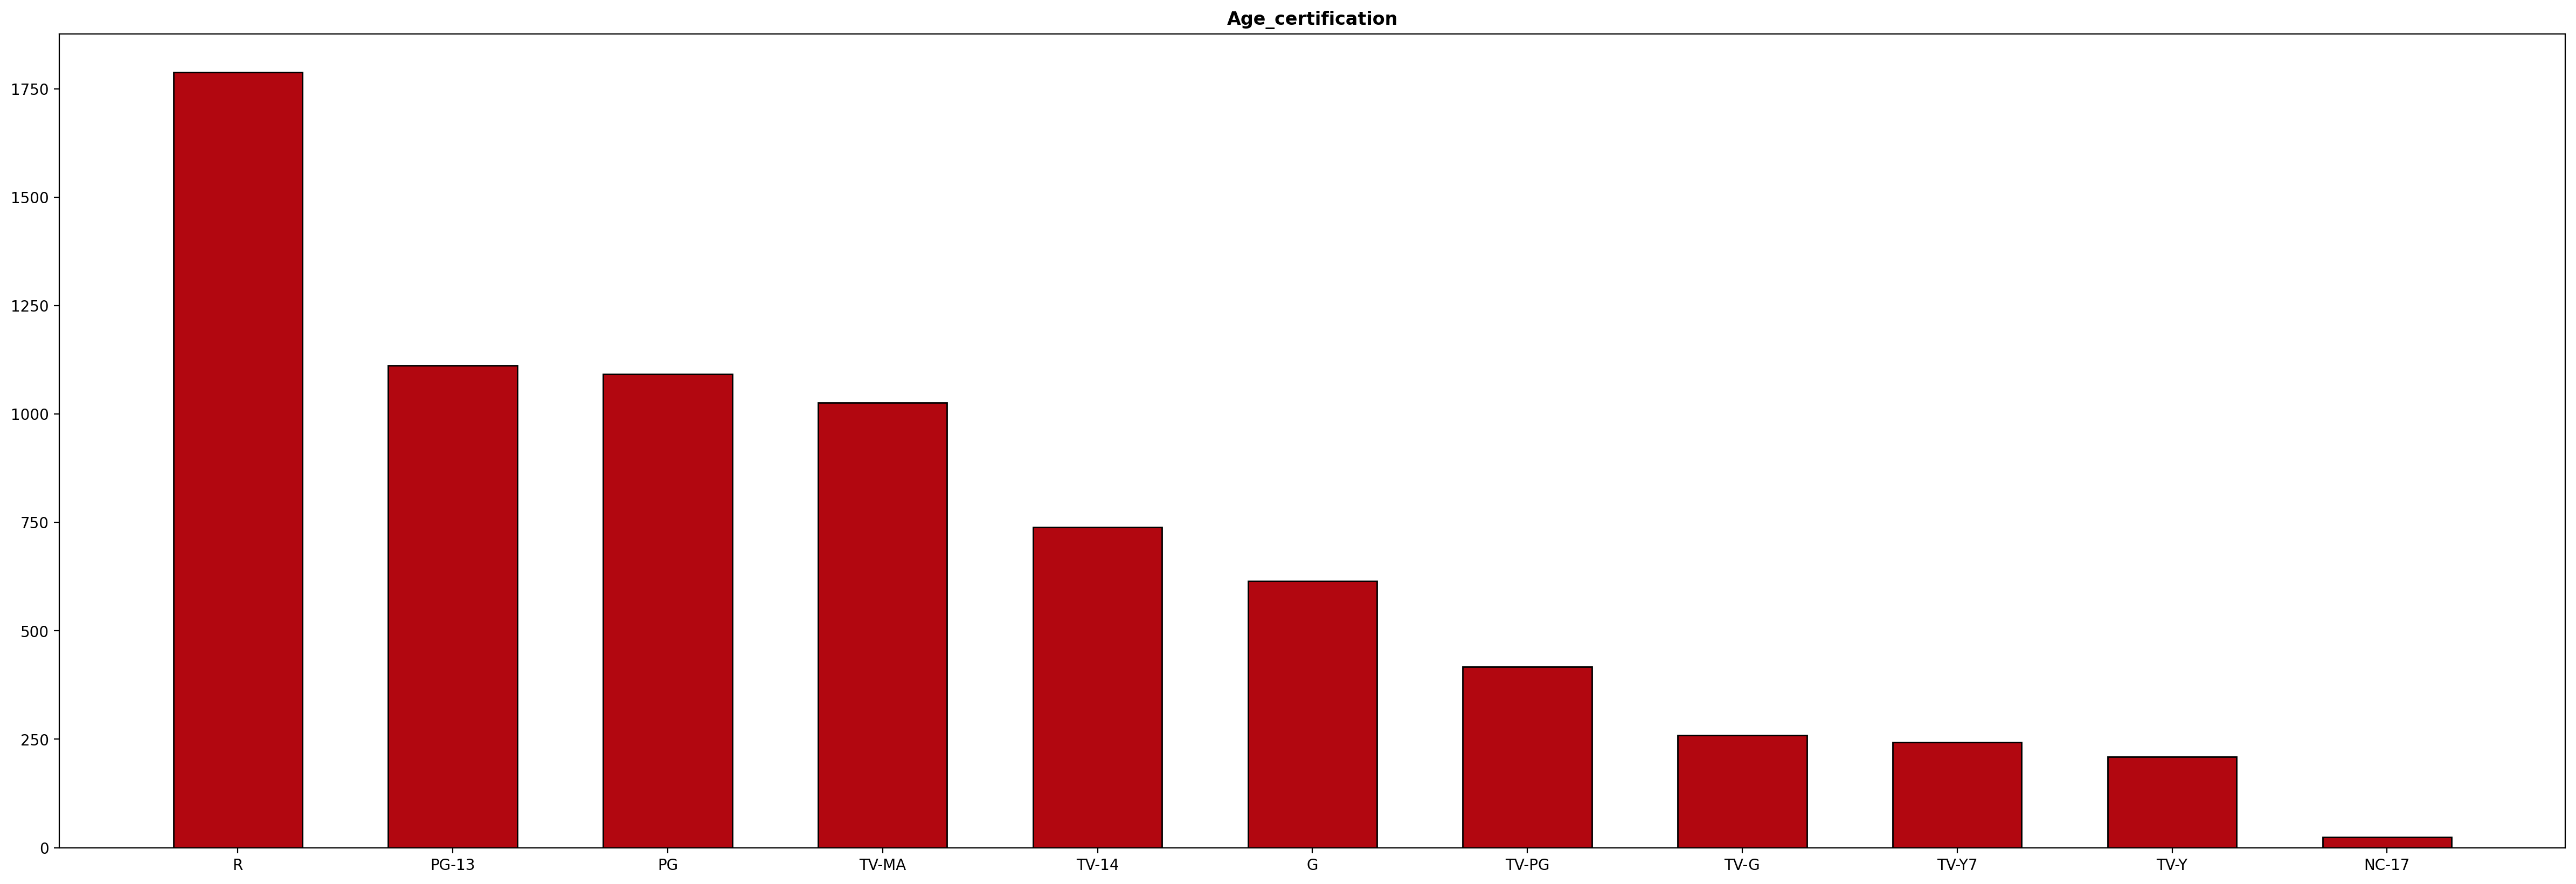

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(30, 10), dpi=200)
ax.bar(netflix_rating.index, netflix_rating, color="#b20710", width=0.6, edgecolor='black')
ax.set_title(f'Age_certification', fontweight='bold')
plt.show()

In [ ]:
#알아보기 쉽게 rating_ages 변경

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

wnf['age_certification'] = wnf['age_certification'].replace(ratings_ages)
condition = (wnf.age_certification != 'NaN')

wnf = wnf[condition]
age_rating = wnf['age_certification'].value_counts() 

In [ ]:
age_rating

Adults        2839
Teens         1851
Older Kids    1752
Kids          1084
Name: age_certification, dtype: int64

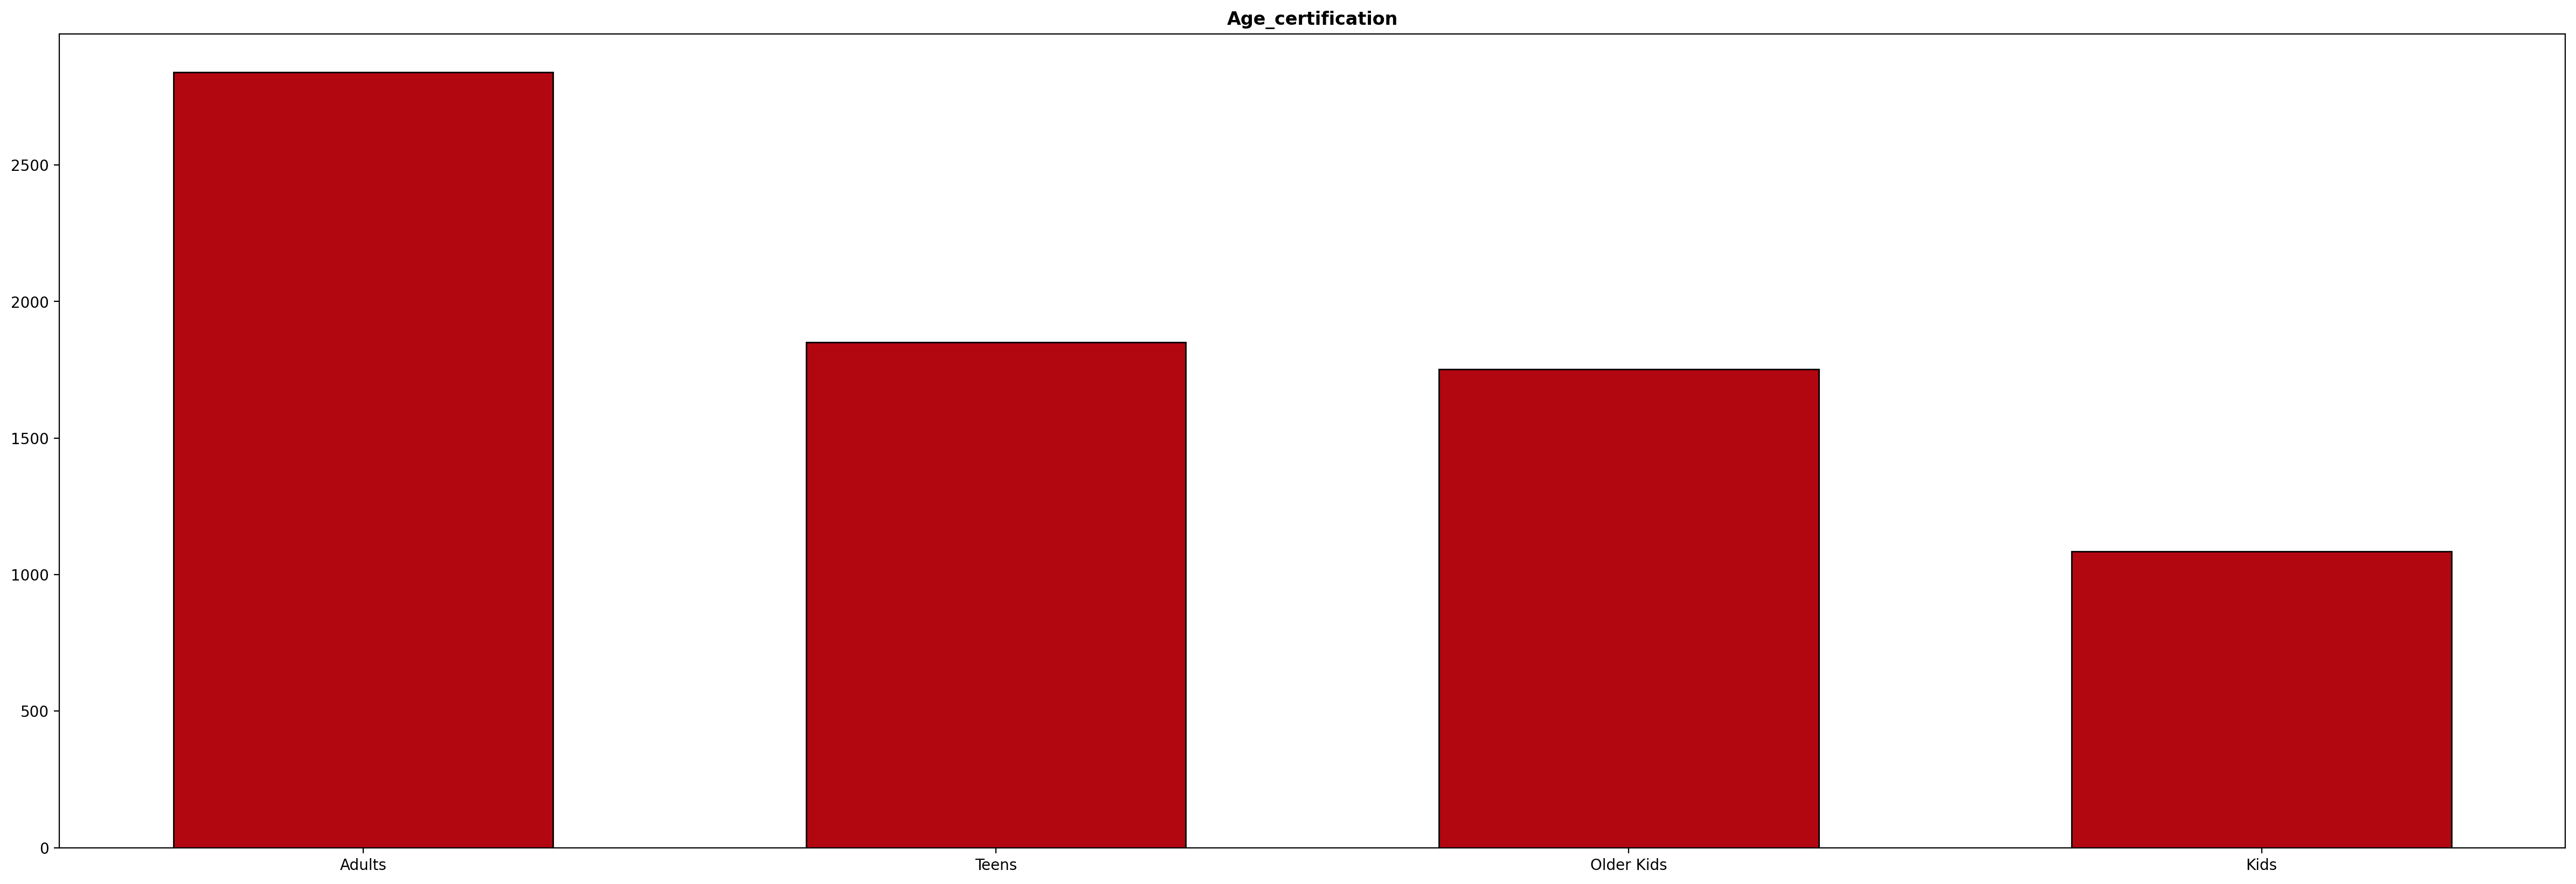

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(30, 10), dpi=200)
ax.bar(age_rating.index, age_rating, color="#b20710", width=0.6, edgecolor='black')
ax.set_title(f'Age_certification', fontweight='bold')
plt.show()

### `Production Countries` 시각화 

In [ ]:
top20 = df_concat['new_production_countries'].value_counts().head(20)

fig = px.bar(top20, y = top20.index, x = top20.values, orientation = 'h', color = top20.index,
             text = top20.values)

fig.update_traces(textfont_color = "white")

fig.update_layout(
    title = dict(
        text = "제작 국가별 작품 수 Top20",
        font_size = 20
    ),
    xaxis = dict(
        title = '작품 수'
    ),
    yaxis = dict(
        title = '국가명'
    ),
    showlegend = False,
    template = 'plotly_white'
)

fig.show()

### `Production Countries- Type`  

In [ ]:
top20 = df_concat[df_concat['type'] == "MOVIE"]['new_production_countries'].value_counts().head(20)

fig = px.bar(top20, y = top20.index, x = top20.values, orientation = 'h', color = top20.index,
             text = top20.values)

fig.update_traces(textfont_color = "white")

fig.update_layout(
    title = dict(
        text = "제작 국가별 Moive 작품 수 Top20",
        font_size = 20
    ),
    xaxis = dict(
        title = '작품 수'
    ),
    yaxis = dict(
        title = '국가명'
    ),
    showlegend = False,
    template = 'plotly_white'
)

fig.show()

In [ ]:
top20 = df_concat[df_concat['type'] == "SHOW"]['new_production_countries'].value_counts().head(20)

fig = px.bar(top20, y = top20.index, x = top20.values, orientation = 'h', color = top20.index,
             text = top20.values)

fig.update_traces(textfont_color = "white")

fig.update_layout(
    title = dict(
        text = "제작 국가별 Show 작품 수 Top20",
        font_size = 20
    ),
    xaxis = dict(
        title = '작품 수'
    ),
    yaxis = dict(
        title = '국가명'
    ),
    showlegend = False,
    template = 'plotly_white'
)

fig.show()

### `Genres` 시각화 

In [ ]:
df_concat.head()

id                            title   type  \
0   tm84618                      Taxi Driver  MOVIE   
1  tm127384  Monty Python and the Holy Grail  MOVIE   
2   tm70993                    Life of Brian  MOVIE   
3  tm190788                     The Exorcist  MOVIE   
4   ts22164     Monty Python's Flying Circus   SHOW   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins to adapt an e...          1973   
4  A British sketch comedy series with the shows ...          1969   

  age_certification  runtime                  genres  seasons  imdb_score  \
0                 R      113      ['crime', 'drama']      0.0         8.3   
1                PG       91   ['comedy', 'fantasy']      0.0         8.2   
2                 R       94              ['comedy']      0.0         8.0   
3                 R      133              ['horror']      0.0         8.1   
4             TV-14       30  ['comedy', 'european']      4.0         8.8   

   imdb_votes  tmdb_popularity  tmdb_score Platform new_production_countries  
0    795222.0           27.612         8.2       NF                       US  
1    530877.0           18.216         7.8       NF                       GB  
2    392419.0           17.505         7.8       NF                       GB  
3    391942.0           95.337         7.7       NF                       US  
4     72895.0           12.919         8.3       NF                       GB

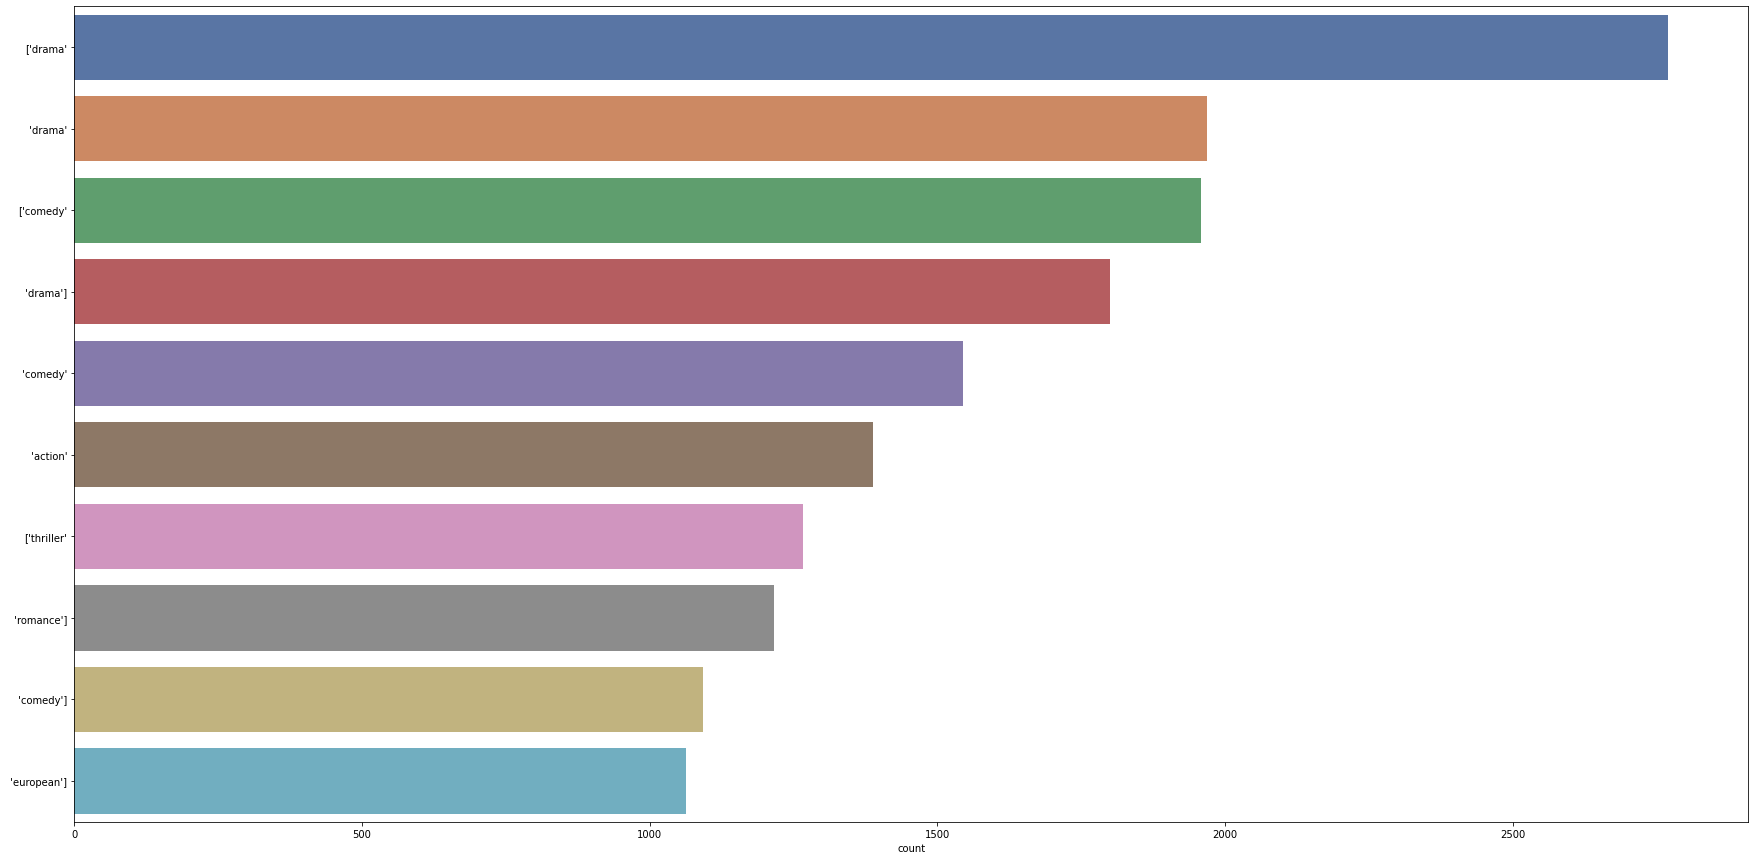

In [ ]:
# Top 10 Genre
#list unpacking해서, 각각 count해서 최빈장르 찾아내는 문제로 바꾸어주어야함.

genre_list = df_concat.set_index('title').genres.str.split(",",expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(30,15))
sns.countplot(y=genre_list, order= genre_list.value_counts().index[:10],
              palette='deep')
plt.show()

In [ ]:
#Genre List unpacking

df_1 = df_concat['genres']

list_1=[]
for i in df_1:
  text1 = i.replace("[","")
  text2 = text1.replace("]","")
  text3 = text2.replace("'","")
  list_1.append(text3)

df_concat['new_genres'] = list_1
df_concat = df_concat.drop('genres', axis = 1)

In [ ]:
#Genre 다시 시각화

top20 = df_concat['new_genres'].value_counts().head(20)

fig = px.bar(top20, y = top20.index, x = top20.values, orientation = 'h', color = top20.index,
             text = top20.values)

fig.update_traces(textfont_color = "white")

fig.update_layout(
    title = dict(
        text = "장르별 작품 수 Top20",
        font_size = 20
    ),
    xaxis = dict(
        title = '작품 수'
    ),
    yaxis = dict(
        title = '장르'
    ),
    showlegend = False,
    template = 'plotly_white'
)

fig.show()

 `Multi Genre, Single Genre` 구분

In [ ]:
genre_type = df_concat[['type', 'new_genres']]

In [ ]:
genre_type.head()

type        new_genres
0  MOVIE      crime, drama
1  MOVIE   comedy, fantasy
2  MOVIE            comedy
3  MOVIE            horror
4   SHOW  comedy, european

In [ ]:
genre_type['num_genre'] = genre_type['new_genres'].apply(lambda x: len(x.split(',')))

In [ ]:
genre_type['multi'] = genre_type['num_genre'].apply(lambda x: 1 if x > 2 else 0)
genre_type.drop(columns=['new_genres'], inplace=True)

In [ ]:
genre_type.tail()

type  num_genre  multi
14978  MOVIE          1      0
14979  MOVIE          2      0
14980   SHOW          1      0
14981  MOVIE          1      0
14982   SHOW          1      0

In [ ]:
tv_multi = genre_type[genre_type['type']=='SHOW']['multi'].value_counts()

In [ ]:
mv_multi = genre_type[genre_type['type']=='MOVIE']['multi'].value_counts()

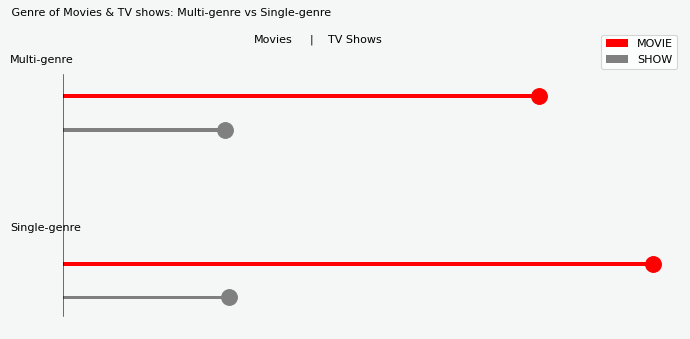

In [ ]:
colors = ['#221f1f', '#b20710', '#e50914','grey']

fig, ax = plt.subplots(figsize = (10,5), dpi = 80)
fig.patch.set_facecolor('#f5f6f6')
ax.set_facecolor('#f5f6f6')

ax.barh(y = [2.05,2.3], width = mv_multi.values,height = 0.0052, color = 'red', label='MOVIE')
ax.barh( y = [2,2.25], width = tv_multi.values, height = 0.0055, color = 'grey', label='SHOW')

ax.scatter(y = [2.05,2.3], x = mv_multi.values, s = 200, c = 'red')
ax.scatter(y = [2,2.25], x = tv_multi.values, s = 200, c = 'grey')

ax.axvline(ymin = 0.05, ymax = 0.85, x = 0, **{'linewidth':0.5},color = 'black',alpha = 1)


ax.text(-590,2.42, ' Genre of Movies & TV shows: Multi-genre vs Single-genre')

ax.text(-570,2.35, 'Multi-genre')
ax.text(-570,2.10, 'Single-genre')


ax.text(2050, 2.38, 'Movies', alpha = 1)
ax.text(2650, 2.38, '|',alpha = 1)
ax.text(2850, 2.38, 'TV Shows', alpha = 1)
ax.set_ylim([1.95,2.4])

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.legend()

for loc in ['left','right','bottom','top']:
    ax.spines[loc].set_visible(False)

fig.show()

### `Release year` 시각화 

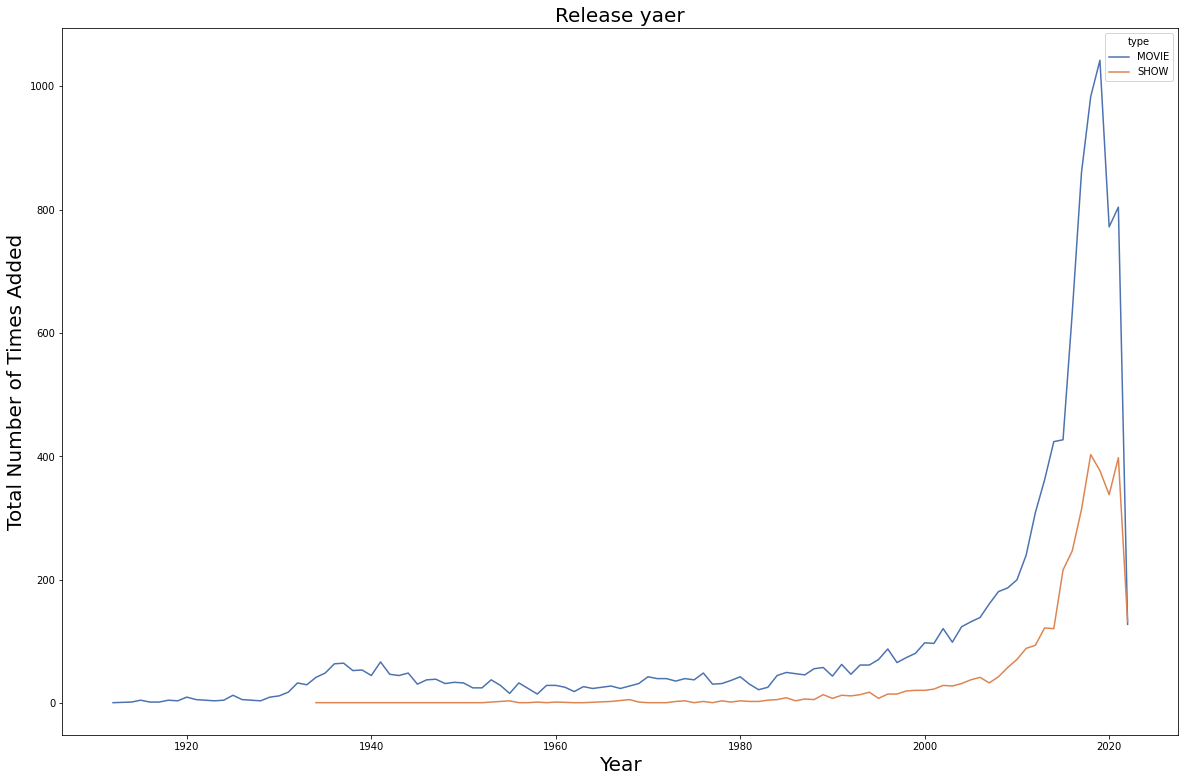

In [ ]:
#Release_year

import seaborn as sns

type_year = (df_concat.groupby(['type','release_year'])['title'].size().reset_index())

fig = plt.figure(figsize=(20,13))
sns.lineplot(x = 'release_year', y = 'title', data = type_year, hue ='type', markers = True, palette = 'deep')

plt.title("Release yaer",fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Total Number of Times Added',fontsize = 20)

plt.show()

### `IMDB SCORE - Type`  시각화 

In [ ]:
fig = px.histogram(df_concat, x="imdb_score", color="type")
fig.update_layout(barmode='group')
fig.show()
fig = px.histogram(df_concat, x="tmdb_score", color="type")
fig.update_layout(barmode='group')
fig.show()

### `Platform - Genre ` 

In [ ]:
#NERFLIX
top20 = df_concat[df_concat['Platform'] == "NF"]['new_genres'].value_counts().head(20)

fig = px.bar(top20, y = top20.index, x = top20.values, orientation = 'h', color = top20.index,
             text = top20.values)

fig.update_traces(textfont_color = "white")

fig.update_layout(
    title = dict(
        text = "NF 장르 Top20",
        font_size = 20
    ),
    xaxis = dict(
        title = 'NF 장르수'
    ),
    yaxis = dict(
        title = '장르'
    ),
    showlegend = False,
    template = 'plotly_white'
)

fig.show()

In [ ]:
#AMAZON
top20 = df_concat[df_concat['Platform'] == "AM"]['new_genres'].value_counts().head(20)

fig = px.bar(top20, y = top20.index, x = top20.values, orientation = 'h', color = top20.index,
             text = top20.values)

fig.update_traces(textfont_color = "white")

fig.update_layout(
    title = dict(
        text = "AM 장르 Top20",
        font_size = 20
    ),
    xaxis = dict(
        title = 'AM 장르수'
    ),
    yaxis = dict(
        title = '장르'
    ),
    showlegend = False,
    template = 'plotly_white'
)

fig.show()

In [ ]:
#Disney
top20 = df_concat[df_concat['Platform'] == "DS"]['new_genres'].value_counts().head(20)

fig = px.bar(top20, y = top20.index, x = top20.values, orientation = 'h', color = top20.index,
             text = top20.values)

fig.update_traces(textfont_color = "white")

fig.update_layout(
    title = dict(
        text = "DS 장르 Top20",
        font_size = 20
    ),
    xaxis = dict(
        title = 'DS 장르수'
    ),
    yaxis = dict(
        title = '장르'
    ),
    showlegend = False,
    template = 'plotly_white'
)

fig.show()

In [ ]:
#Paramount
top20 = df_concat[df_concat['Platform'] == "PM"]['new_genres'].value_counts().head(20)

fig = px.bar(top20, y = top20.index, x = top20.values, orientation = 'h', color = top20.index,
             text = top20.values)

fig.update_traces(textfont_color = "white")

fig.update_layout(
    title = dict(
        text = "PM 장르 Top20",
        font_size = 20
    ),
    xaxis = dict(
        title = 'PM 장르수'
    ),
    yaxis = dict(
        title = '장르'
    ),
    showlegend = False,
    template = 'plotly_white'
)

fig.show()

### `Title, Description Keyword` 분석

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
word_merge = df_concat[['title', 'description']]

title_list = word_merge['title'].to_list()  
description_list = word_merge['description'].to_list()  

### `Title Keyword` 

In [ ]:
clean_title_list = []

for item in title_list:
    clean_title_list.append(str.lower(item))   

In [ ]:
tokenized_sents = [word_tokenize(i) for i in clean_title_list]

In [ ]:
tokens_pos = [pos_tag(i) for i in tokenized_sents]
token_pos_1d = sum(tokens_pos, [])
title_nouns_list = [word for word, pos in token_pos_1d if pos in ['NN']]

In [ ]:
#불용어 제거
stopwords_list = stopwords.words('english')
unique_nn_words = set(title_nouns_list)
for word in unique_nn_words:
    if word in stopwords_list:
        while word in title_nouns_list: title_nouns_list.remove(word)

In [ ]:
c = Counter(title_nouns_list)
k = 5
print(c.most_common(k))

[('love', 186), ('story', 145), ('man', 141), ('life', 137), ('christmas', 117)]


In [ ]:
len(title_nouns_list)

21500

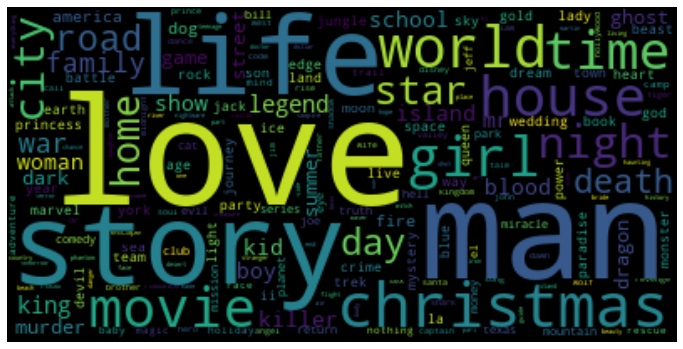

In [ ]:
#Title wordcloud

str1 = " ".join(title for title in title_nouns_list)
plt.figure(figsize=[12,15])
plot_d = WordCloud(stopwords = STOPWORDS, collocations = False, max_font_size=90, max_words=200).generate(str1)
plt.imshow(plot_d, interpolation='bilinear')
plt.axis("off")
plt.show()

### `Description Keyword` 

In [ ]:
#title_list와 마찬가지로

clean_description_list = []

for item in description_list:
    clean_description_list.append(str.lower(item))   

description_tokenized_sents = [word_tokenize(i) for i in clean_description_list]
description_tokens_pos = [pos_tag(i) for i in description_tokenized_sents]
description_token_pos_1d = sum(description_tokens_pos, [])
description_nouns_list = [word for word, pos in description_token_pos_1d if pos in ['NN']] 

In [ ]:
stopwords_list = stopwords.words('english')
unique_nn_words = set(description_nouns_list)
for word in unique_nn_words:
    if word in stopwords_list:
        while word in description_nouns_list: description_nouns_list.remove(word)

In [ ]:
c = Counter(description_nouns_list)
k = 5
print(c.most_common(k))

[('life', 2308), ('world', 1692), ('family', 1641), ('man', 1304), ('series', 1286)]


In [ ]:
len(description_nouns_list)

171888

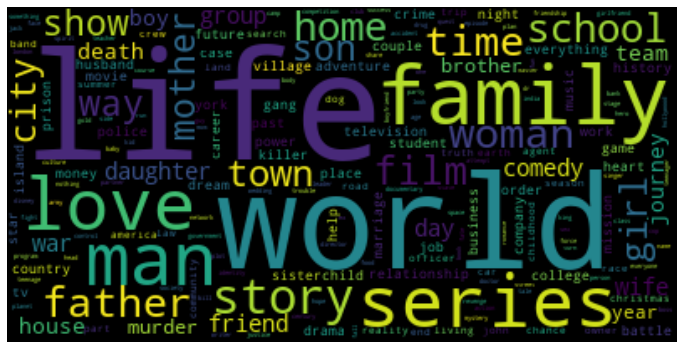

In [ ]:
#description keyword wordcloud

str1 = " ".join(description for description in description_nouns_list)
plt.figure(figsize=[12,15])
plot_d = WordCloud(stopwords = STOPWORDS, collocations = False, max_font_size=90, max_words=200).generate(str1)
plt.imshow(plot_d, interpolation='bilinear')
plt.axis("off")
plt.show()

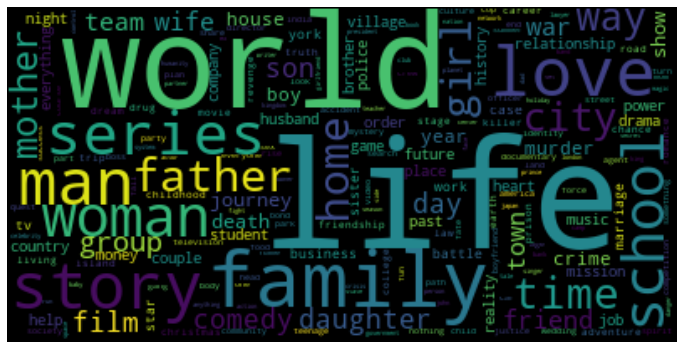

In [ ]:
#netflix_description_list
n_description_list = df_n['description'].to_list()

n_clean_description_list = []

for item in n_description_list:
    n_clean_description_list.append(str.lower(item))   

n_description_tokenized_sents = [word_tokenize(i) for i in n_clean_description_list]
n_description_tokens_pos = [pos_tag(i) for i in n_description_tokenized_sents]
n_description_token_pos_1d = sum(n_description_tokens_pos, [])
n_description_nouns_list = [word for word, pos in n_description_token_pos_1d if pos in ['NN']] 

n_unique_nn_words = set(n_description_nouns_list)
for word in n_unique_nn_words:
    if word in stopwords_list:
        while word in n_description_nouns_list: n_description_nouns_list.remove(word)

#description keyword wordcloud

str1 = " ".join(description for description in n_description_nouns_list)
plt.figure(figsize=[12,15])
plot_d = WordCloud(stopwords = STOPWORDS, collocations = False, max_font_size=90, max_words=200).generate(str1)
plt.imshow(plot_d, interpolation='bilinear')
plt.axis("off")
plt.show()

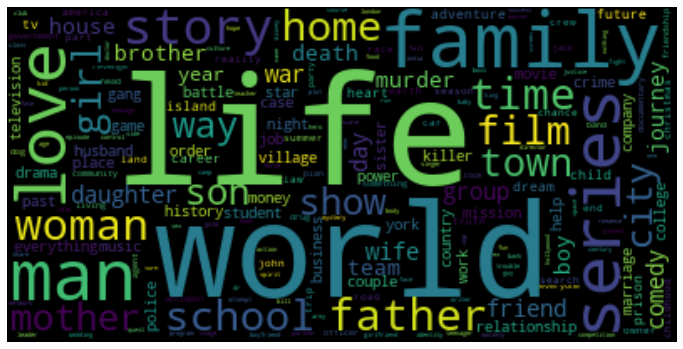

In [ ]:
#disney_description keyword wordcloud
d_description_list = df_d['description'].to_list()

d_clean_description_list = []

for item in d_description_list:
    d_clean_description_list.append(str.lower(item))   

d_description_tokenized_sents = [word_tokenize(i) for i in d_clean_description_list]
d_description_tokens_pos = [pos_tag(i) for i in d_description_tokenized_sents]
d_description_token_pos_1d = sum(d_description_tokens_pos, [])
d_description_nouns_list = [word for word, pos in description_token_pos_1d if pos in ['NN']] 

n_unique_nn_words = set(d_description_nouns_list)
for word in n_unique_nn_words:
    if word in stopwords_list:
        while word in d_description_nouns_list: d_description_nouns_list.remove(word)
str1 = " ".join(description for description in d_description_nouns_list)
plt.figure(figsize=[12,15])
plot_d = WordCloud(stopwords = STOPWORDS, collocations = False, max_font_size=90, max_words=200).generate(str1)
plt.imshow(plot_d, interpolation='bilinear')
plt.axis("off")
plt.show()

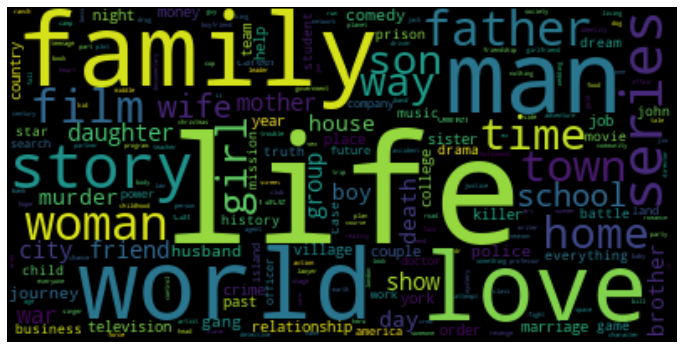

In [ ]:
#amazon_description_list
a_description_list = df_a['description'].to_list()

a_clean_description_list = []

for item in a_description_list:
    a_clean_description_list.append(str.lower(item))   

a_description_tokenized_sents = [word_tokenize(i) for i in a_clean_description_list]
a_description_tokens_pos = [pos_tag(i) for i in a_description_tokenized_sents]
a_description_token_pos_1d = sum(a_description_tokens_pos, [])
a_description_nouns_list = [word for word, pos in a_description_token_pos_1d if pos in ['NN']] 

a_unique_nn_words = set(d_description_nouns_list)
for word in a_unique_nn_words:
    if word in stopwords_list:
        while word in a_description_nouns_list: a_description_nouns_list.remove(word)
str1 = " ".join(description for description in a_description_nouns_list)
plt.figure(figsize=[12,15])
plot_d = WordCloud(stopwords = STOPWORDS, collocations = False, max_font_size=90, max_words=200).generate(str1)
plt.imshow(plot_d, interpolation='bilinear')
plt.axis("off")
plt.show()

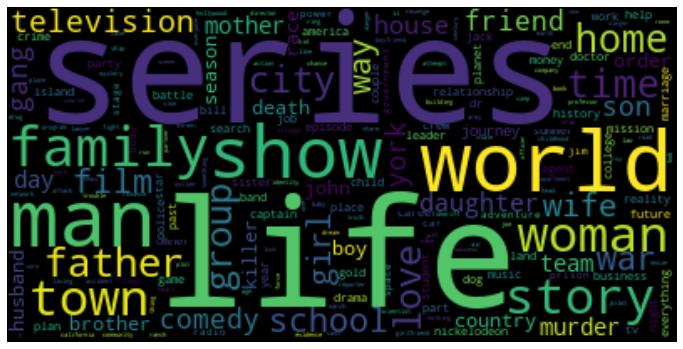

In [ ]:
#paramount_description_list
p_description_list = df_p['description'].to_list()

p_clean_description_list = []

for item in p_description_list:
    p_clean_description_list.append(str.lower(item))   

p_description_tokenized_sents = [word_tokenize(i) for i in p_clean_description_list]
p_description_tokens_pos = [pos_tag(i) for i in p_description_tokenized_sents]
p_description_token_pos_1d = sum(p_description_tokens_pos, [])
p_description_nouns_list = [word for word, pos in p_description_token_pos_1d if pos in ['NN']] 

p_unique_nn_words = set(p_description_nouns_list)
for word in p_unique_nn_words:
    if word in stopwords_list:
        while word in p_description_nouns_list: p_description_nouns_list.remove(word)
        
str1 = " ".join(description for description in p_description_nouns_list)
plt.figure(figsize=[12,15])
plot_d = WordCloud(stopwords = STOPWORDS, collocations = False, max_font_size=90, max_words=200).generate(str1)
plt.imshow(plot_d, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import operator
c = Counter(title_nouns_list)
most_common = c.most_common(50)
print(most_common)

[('love', 186), ('story', 145), ('man', 141), ('life', 137), ('christmas', 117), ('world', 101), ('girl', 98), ('house', 98), ('movie', 96), ('time', 90), ('night', 90), ('city', 80), ('star', 75), ('home', 70), ('day', 62), ('road', 57), ('death', 57), ('family', 57), ('war', 56), ('legend', 53), ('king', 51), ('blood', 46), ('show', 45), ('boy', 45), ('school', 44), ('island', 43), ('killer', 42), ('kid', 41), ('woman', 41), ('dragon', 39), ('game', 39), ('murder', 39), ('ghost', 39), ('street', 38), ('summer', 38), ('dark', 37), ('america', 37), ('fire', 36), ('mr.', 36), ('dog', 35), ('princess', 34), ('marvel', 34), ('lady', 33), ('space', 33), ('devil', 33), ('heart', 33), ('monster', 32), ('year', 32), ('party', 31), ('queen', 30)]


In [ ]:
word_order = sorted(
    most_common,
    key = operator.itemgetter(1),
    reverse = True) 

word = pd.DataFrame(word_order, columns=['words', 'nums'])
word.head()

words  nums
0       love   186
1      story   145
2        man   141
3       life   137
4  christmas   117

`Merge-data Title, Description Keyword Count` 

In [ ]:
df_word = word[:20] 
df_word = df_word.sort_values('nums', ascending=False)

fig = px.bar(df_word, y = df_word['words'], x = df_word['nums'], orientation = 'h', color = df_word['words'],
             text = df_word['nums'])

fig.update_traces(textfont_color = "white")

fig.update_layout(
    title = dict(
        text = "NN_title words Top20",
        font_size = 20
    ),
    xaxis = dict(
        title = 'words'
    ),
    yaxis = dict(
        title = 'nums'
    ),
    showlegend = False,
    template = 'plotly_white'
)

fig.show()

In [ ]:
c = Counter(description_nouns_list)
most_common_d = c.most_common(50)
print(most_common_d)

[('life', 2308), ('world', 1692), ('family', 1641), ('man', 1304), ('series', 1286), ('love', 1258), ('story', 1246), ('father', 918), ('woman', 893), ('time', 887), ('school', 840), ('home', 828), ('film', 786), ('town', 744), ('girl', 734), ('show', 694), ('way', 691), ('city', 657), ('mother', 640), ('son', 622), ('group', 612), ('daughter', 605), ('friend', 579), ('war', 571), ('day', 570), ('wife', 568), ('comedy', 515), ('team', 489), ('death', 488), ('boy', 464), ('house', 460), ('journey', 456), ('murder', 441), ('brother', 421), ('relationship', 380), ('year', 375), ('television', 369), ('night', 364), ('help', 364), ('york', 360), ('police', 355), ('gang', 347), ('order', 344), ('husband', 342), ('job', 338), ('country', 335), ('crime', 324), ('everything', 314), ('money', 310), ('village', 308)]


In [ ]:
word_order_d = sorted(
    most_common_d,
    key = operator.itemgetter(1),
    reverse = True) 

word_d = pd.DataFrame(word_order_d, columns=['words', 'nums'])
word_d.head()

words  nums
0    life  2308
1   world  1692
2  family  1641
3     man  1304
4  series  1286

In [ ]:
df_word_d = word_d[:20] 
df_word_d = df_word_d.sort_values('nums', ascending=False)

fig = px.bar(df_word_d, y = df_word_d['words'], x = df_word_d['nums'], orientation = 'h', color = df_word_d['words'],
             text = df_word_d['nums'])

fig.update_traces(textfont_color = "white")

fig.update_layout(
    title = dict(
        text = "NN_description words Top20",
        font_size = 20
    ),
    xaxis = dict(
        title = 'words'
    ),
    yaxis = dict(
        title = 'nums'
    ),
    showlegend = False,
    template = 'plotly_white'
)

fig.show()

## `상관관계 분석` 

['imdb_score' 'tmdb_score' 'seasons' 'imdb_votes' 'tmdb_popularity'
 'runtime' 'release_year']


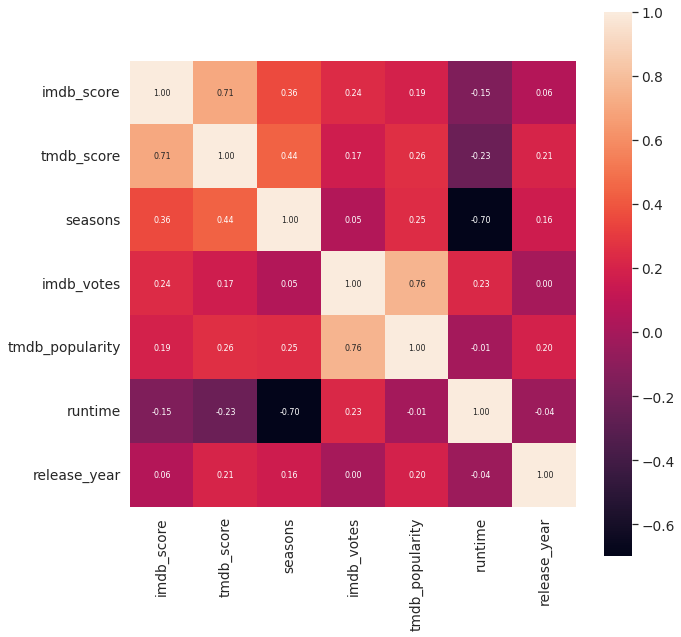

In [ ]:
import scipy as sp
from scipy import stats
#상관관계를 순위별로 가지고 온다
cor_abs = abs(df_concat.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=10, columns='imdb_score').index

cor = np.array(sp.stats.spearmanr(df_concat[cor_cols].values))[0]
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

In [ ]:
#상관관계가 높은 것을 우선적으로 시각화 하자! 
info = ['tmdb_score' , 'imdb_votes', 'tmdb_popularity', 'runtime', 'release_year']

count = 0
for i in range(5):
        fig = px.scatter(df_concat, x = info[count], y = "imdb_score",
                         title = 'score')
        fig.show()
        count += 1

  - IMDB Score와 TMDB Score는 높은 상관관계를 가지고 있음을 알 수 있음.


In [ ]:
stats.spearmanr(df_concat['tmdb_score'], df_concat['imdb_score'])

SpearmanrResult(correlation=0.7069049802808739, pvalue=0.0)

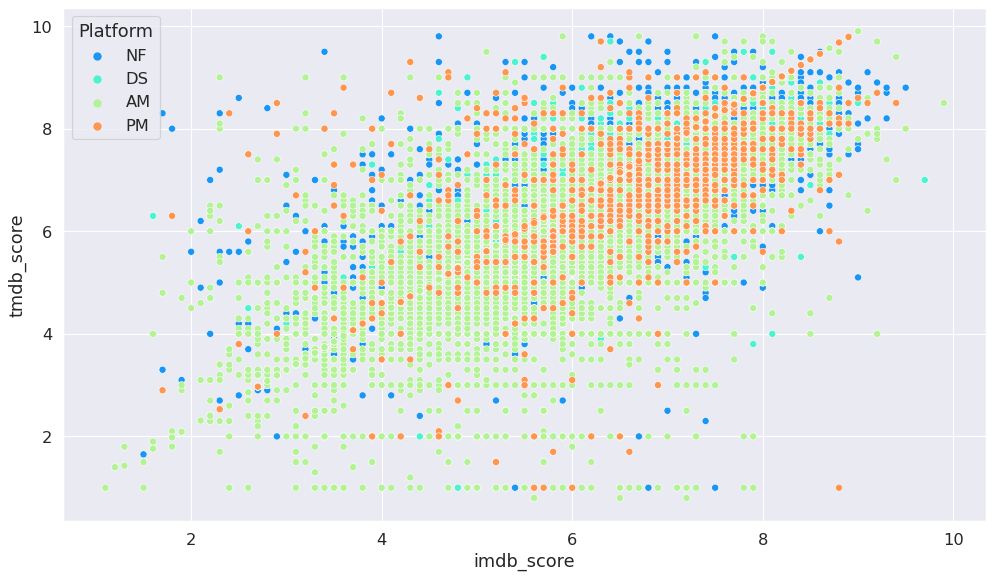

In [ ]:
plt.figure(figsize=(14, 8), dpi=85)
sns.scatterplot(x = "imdb_score", y = "tmdb_score", data = df_concat, hue="Platform", palette="rainbow")

### `Running time-IMDB SCORE` 

In [ ]:
stats.spearmanr(df_concat['runtime'],df_concat['imdb_score'])

SpearmanrResult(correlation=-0.14890834647880535, pvalue=4.958586501181725e-75)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



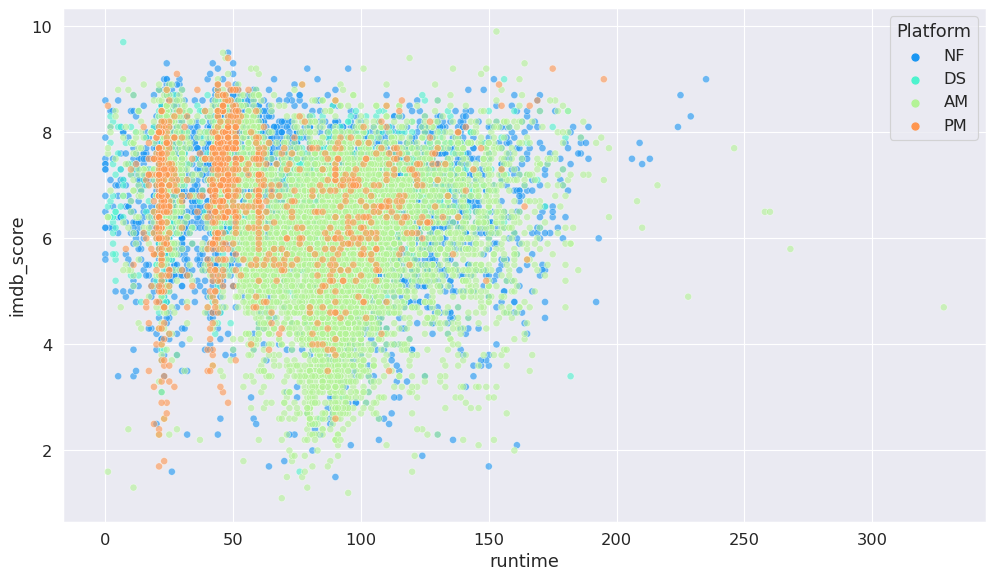

In [ ]:
plt.figure(figsize=(14, 8), dpi=85)
sns.scatterplot("runtime", "imdb_score", data = df_concat, hue="Platform", palette = "rainbow", alpha=0.6);

- Running time과 IMDB SCORE는 상관관계가 낮음을 알 수 있음. 따라, "Running time이 긴 작품을 더 선호할 것이다는 가설이 기각

### `Release year-IMDB SCORE` 

In [ ]:
stats.spearmanr(df_concat['release_year'], df_concat['imdb_score'])

SpearmanrResult(correlation=0.05610227981628477, pvalue=6.32890176968118e-12)

- Release year가 높을 수록, 즉 최근의 영화일 수록 IMDB_SCORE가 높을 것이다라는 가설이 기각 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



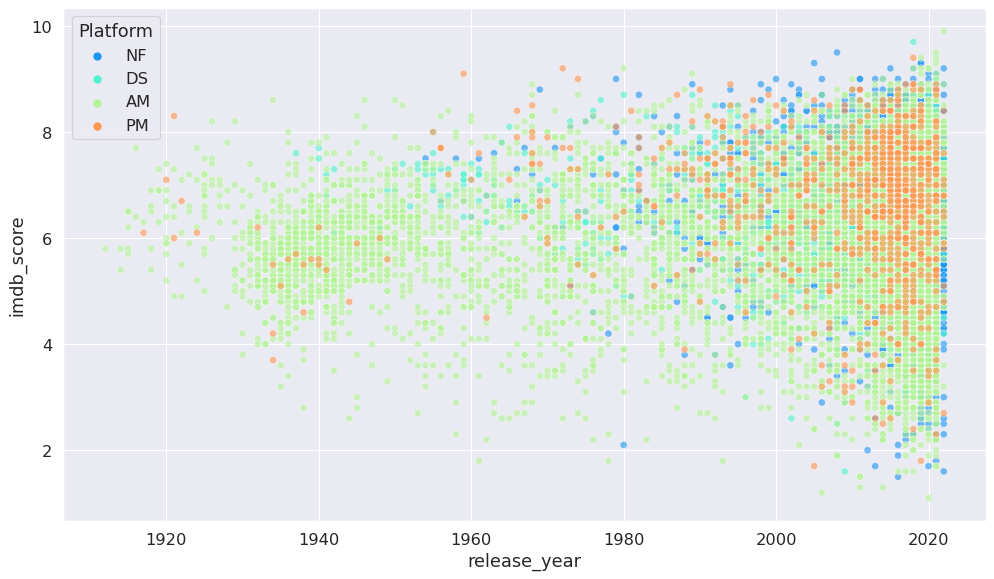

In [ ]:
plt.figure(figsize=(14, 8), dpi=85)
sns.scatterplot("release_year", "imdb_score", data = df_concat, hue="Platform", palette = "rainbow", alpha=0.6);

- release_year, imdb_score, tmdb_score 3D Visualization

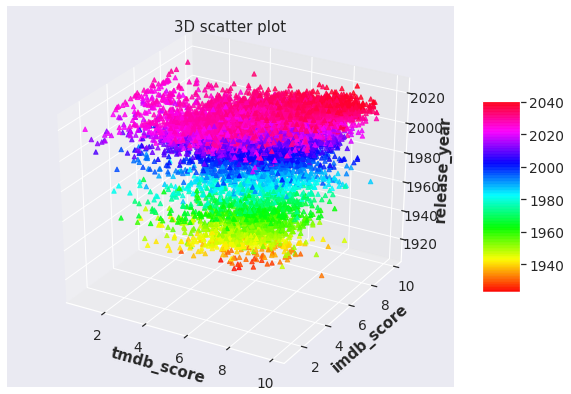

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

z = df_concat['release_year']
x = df_concat['tmdb_score']
y = df_concat['imdb_score']
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')
 
# Creating plot
ax.set_xlabel('tmdb_score', fontweight ='bold')
ax.set_ylabel('imdb_score', fontweight ='bold')
ax.set_zlabel('release_year', fontweight ='bold')
plt.title("3D scatter plot")
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

### `IMDB_VOTES - TMDB_POPULARITY` 

In [ ]:
# imdb_votes랑 tmdb_popularity가 높은 상관관계
stats.spearmanr(df_concat['imdb_votes'], df_concat['tmdb_popularity'])

SpearmanrResult(correlation=0.7604655306840318, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



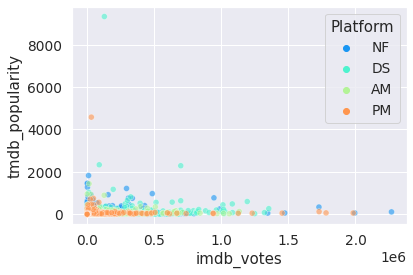

In [ ]:
sns.scatterplot("imdb_votes", "tmdb_popularity", data = df_concat, hue="Platform", palette = "rainbow", alpha=0.6);

### `Type - IMDB SCORE` 

#### 명목형(이분형) & 연속형 - Point biserial correlation coefficient를 통해 correlation 다시 계산

In [ ]:
fig = px.histogram(df_concat, x="imdb_score", color="type")
fig.update_layout(barmode='group')
fig.show()
fig = px.histogram(df_concat, x="tmdb_score", color="type")
fig.update_layout(barmode='group')
fig.show()

In [ ]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df_concat[df_concat['type']=='SHOW']['tmdb_score'], 
                          df_concat[df_concat['type']=='MOVIE']['tmdb_score']], ['SHOW', 'MOVIE'])
fig.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_type = df_concat[['type', 'imdb_score']] 
le = le.fit(df_type['type'])
df_type['type'] = le.transform(df_type['type'])

In [ ]:
stats.pointbiserialr(df_type['type'], df_type['imdb_score'])

PointbiserialrResult(correlation=0.3420670450558222, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



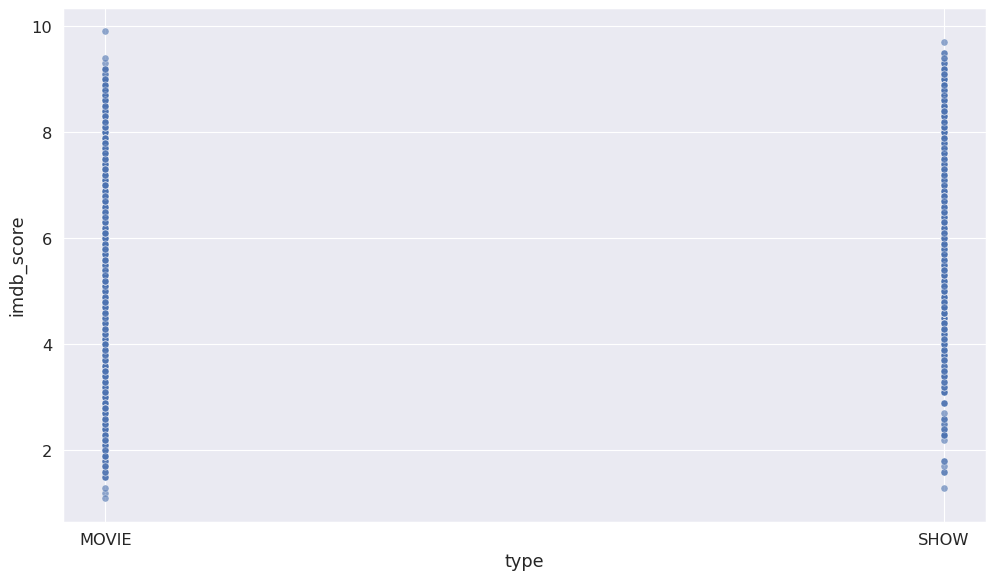

In [ ]:
plt.figure(figsize=(14, 8), dpi=85)
sns.scatterplot("type", "imdb_score", data = df_concat, palette = "husl", alpha=0.6);

- correlation이 0.33으로 낮은 수치로 나오므로 Type이 imdb_score에 영향을 미치는 유의미한 변수가 아님을 알 수 있음.

### `Age-certification - IMDB SCORE` 


In [ ]:
# 데이터에서 비어있는 값을 NaN으로 대체한 것을 제외하고, 시각화
df_platform = df_concat[['Platform', 'age_certification', 'imdb_score', 'tmdb_score']]
condition = (df_platform.age_certification != 'NaN')

wpf = df_platform[condition]

age_cert_df = wpf['age_certification'].value_counts()

In [ ]:
wpf

Platform age_certification  imdb_score  tmdb_score
0           NF                 R         8.3        8.20
1           NF                PG         8.2        7.80
2           NF                 R         8.0        7.80
3           NF                 R         8.1        7.70
4           NF             TV-14         8.8        8.30
...        ...               ...         ...         ...
14969       PM             PG-13         8.2        7.80
14971       PM                 G         5.8        7.30
14974       PM             TV-PG         8.9        9.79
14980       PM             TV-14         2.3        2.53
14982       PM             TV-14         5.4        5.94

[7526 rows x 4 columns]

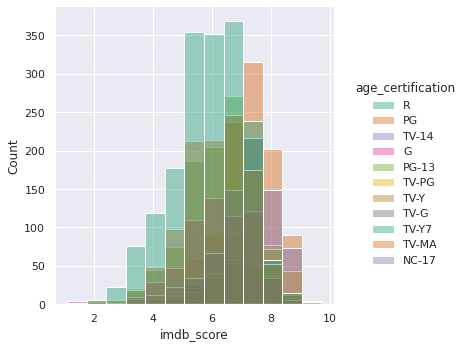

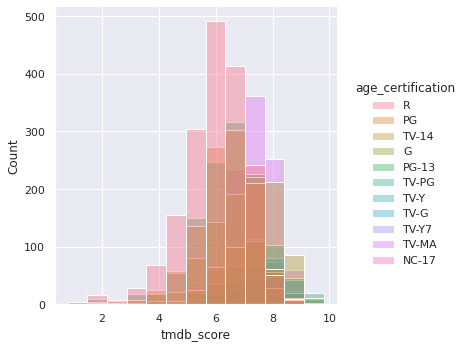

In [ ]:
sns.set(style="darkgrid")

sns.displot(data = wpf, x='imdb_score', bins=13, hue="age_certification", alpha=0.4, palette="Dark2");
sns.displot(data = wpf, x='tmdb_score', bins=13, hue="age_certification", alpha=0.4)

In [ ]:
#알아보기 쉽게 rating_ages 변경

wpf['age_certification'] = wpf['age_certification'].replace(ratings_ages)
condition = (wnf.age_certification != 'NaN')
wpf = wpf[condition]

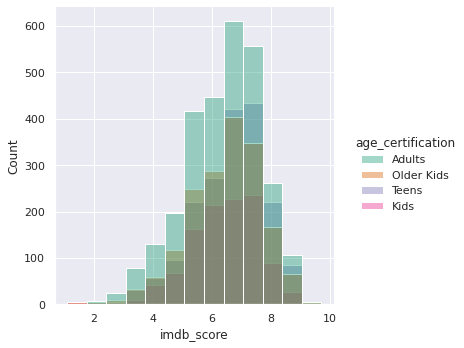

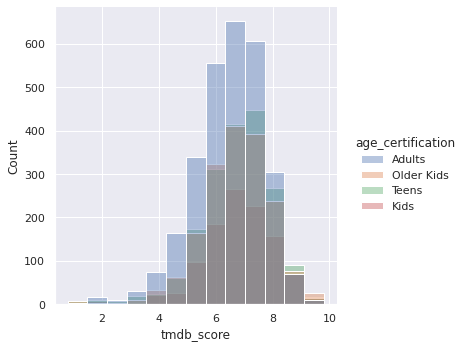

In [ ]:
sns.set(style="darkgrid")

sns.displot(data = wpf, x='imdb_score', bins=13, hue="age_certification", alpha=0.4, palette="Dark2");
sns.displot(data = wpf, x='tmdb_score', bins=13, hue="age_certification", alpha=0.4)

### `Platform - IMDB SCORE, TMDB SCORE` 


In [ ]:
fig = px.histogram(df_concat, x="imdb_score", color="Platform")
fig.update_layout(barmode='group')
fig.show()
fig = px.histogram(df_concat, x="tmdb_score", color="Platform")
fig.update_layout(barmode='group')
fig.show()

In [ ]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df_concat[df_concat['Platform']=='NF']['tmdb_score'], 
                          df_concat[df_concat['Platform']=='AM']['tmdb_score'],
                          df_concat[df_concat['Platform']=='DS']['tmdb_score'],
                          df_concat[df_concat['Platform']=='PM']['tmdb_score']], ['NF', 'AM', 'DS', 'PM'])
fig.show()

## 다중 상관관계

In [ ]:
df_concat['release_year'] = 2000
fig = px.treemap(df_concat, path=['runtime', 'type'], values='release_year')
fig.show()

In [ ]:
fig = px.sunburst(df_concat, path=['runtime', 'type'], values='release_year')
fig.show()

## `High-score movie Imdb_score &Tmdb_score Define` 
- IMDB_score, TMDB_score 상위 10%의 영화들은 어떤 OTT 플랫폼에 모여있을까?

In [ ]:
df_concat["Platform"].nunique

<bound method IndexOpsMixin.nunique of 0        NF
1        NF
2        NF
3        NF
4        NF
         ..
14978    PM
14979    PM
14980    PM
14981    PM
14982    PM
Name: Platform, Length: 14983, dtype: object>

In [ ]:
#상위 10% imdb_score는 7.8점부터 시작
df_concat.imdb_score.describe(percentiles=[.90])

count    14983.000000
mean         6.238724
std          1.274003
min          1.100000
50%          6.300000
90%          7.800000
max          9.900000
Name: imdb_score, dtype: float64

In [ ]:
#상위 10% tmdb_score는 8.0점부터 시작
df_concat.tmdb_score.describe(percentiles=[.90])

count    14983.000000
mean         6.394153
std          1.368677
min          0.800000
50%          6.500000
90%          8.000000
max          9.900000
Name: tmdb_score, dtype: float64

In [ ]:
condition = (df_concat.imdb_score > 7.8) & (df_concat.tmdb_score > 8.0)
df_high = df_concat[condition]

condition_low = (df_concat.imdb_score < 7.8) & (df_concat.tmdb_score < 8.0)
df_low = df_concat[condition_low]

In [ ]:
df_high.head()

id                         title   type  \
0    tm84618                   Taxi Driver  MOVIE   
4    ts22164  Monty Python's Flying Circus   SHOW   
42   ts20681                      Seinfeld   SHOW   
44  tm180542   Once Upon a Time in America  MOVIE   
47   tm22327             Full Metal Jacket  MOVIE   

                                          description  release_year  \
0   A mentally unstable Vietnam War veteran works ...          2000   
4   A British sketch comedy series with the shows ...          2000   
42  A stand-up comedian and his three offbeat frie...          2000   
44  A former Prohibition-era Jewish gangster retur...          2000   
47  A pragmatic U.S. Marine observes the dehumaniz...          2000   

   age_certification  runtime  seasons  imdb_score  imdb_votes  \
0                  R      113      0.0         8.3    795222.0   
4              TV-14       30      4.0         8.8     72895.0   
42             TV-PG       24      9.0         8.9    302700.0   
44                 R      229      0.0         8.3    342335.0   
47                 R      116      0.0         8.3    723306.0   

    tmdb_popularity  tmdb_score Platform new_production_countries  \
0            27.612         8.2       NF                       US   
4            12.919         8.3       NF                       GB   
42          128.743         8.3       NF                       US   
44           21.322         8.4       NF                   US, IT   
47           36.502         8.1       NF                   GB, US   

                new_genres  
0             crime, drama  
4         comedy, european  
42                  comedy  
44  drama, crime, european  
47              drama, war

In [ ]:
df_high.shape

(584, 15)

## `높은 점수`를 받은 작품들은 '대체' 무엇이 다른가? 

In [ ]:
#High_score genre top 10

top10 = df_high['new_genres'].value_counts().head(10)

fig = px.bar(top10, y = top10.index, x = top10.values, orientation = 'h', color = top10.index,
             text = top10.values)

fig.update_traces(textfont_color = "white")

fig.update_layout(
    title = dict(
        text = "장르별 작품 수 Top20",
        font_size = 20
    ),
    xaxis = dict(
        title = '작품 수'
    ),
    yaxis = dict(
        title = '장르'
    ),
    showlegend = False,
    template = 'plotly_white'
)

fig.show()

In [ ]:
#High score movie production countries

top10 = df_high['new_production_countries'].value_counts().head(10)

fig = px.bar(top10, y = top10.index, x = top10.values, orientation = 'h', color = top10.index,
             text = top10.values)

fig.update_traces(textfont_color = "white")

fig.update_layout(
    title = dict(
        text = "제작 국가별 작품 수 Top20",
        font_size = 20
    ),
    xaxis = dict(
        title = '작품 수'
    ),
    yaxis = dict(
        title = '국가명'
    ),
    showlegend = False,
    template = 'plotly_white'
)

fig.show()

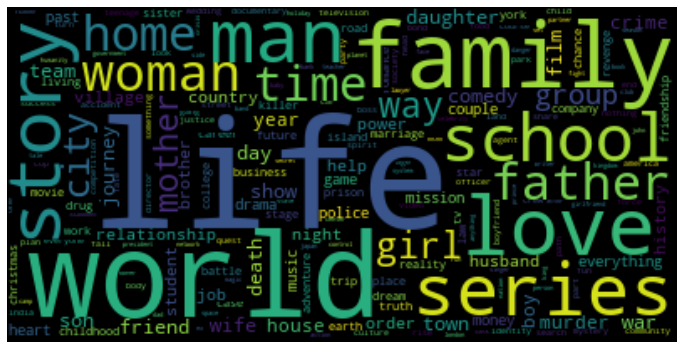

In [ ]:
#High score movie description keyword

h_description_list = df_high['description'].to_list()

h_clean_description_list = []

for item in n_description_list:
    h_clean_description_list.append(str.lower(item))   

h_description_tokenized_sents = [word_tokenize(i) for i in h_clean_description_list]
h_description_tokens_pos = [pos_tag(i) for i in h_description_tokenized_sents]
h_description_token_pos_1d = sum(h_description_tokens_pos, [])
h_description_nouns_list = [word for word, pos in h_description_token_pos_1d if pos in ['NN']] 

h_unique_nn_words = set(h_description_nouns_list)
for word in n_unique_nn_words:
    if word in stopwords_list:
        while word in h_description_nouns_list: h_description_nouns_list.remove(word)

str_h = " ".join(description for description in h_description_nouns_list)
plt.figure(figsize=[12,15])
plot_d = WordCloud(stopwords = STOPWORDS, collocations = False, max_font_size=90, max_words=200).generate(str_h)
plt.imshow(plot_d, interpolation='bilinear')
plt.axis("off")
plt.show()

## 어떤 OTT 플랫폼이 IMDB_SCORE가 높은 작품을 많이 보유하고 있는가?  

## `OTT 플랫폼 별 High score 기준을 만족한 작품` Count

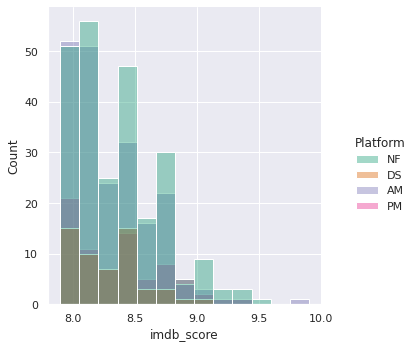

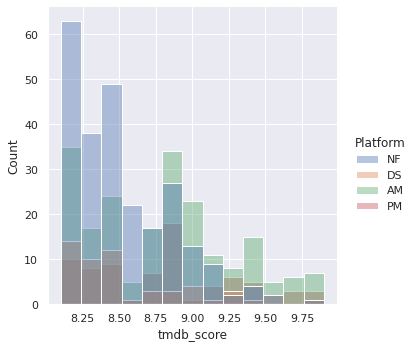

In [ ]:
sns.set(style="darkgrid")
sns.displot(data = df_high, x='imdb_score', bins=13, hue="Platform", alpha=0.4, palette="Dark2");
sns.displot(data = df_high, x='tmdb_score', bins=13, hue="Platform", alpha=0.4)

In [ ]:
a = len(df_high[df_high["Platform"]=="NF"]) / len(df_high)
b = len(df_high[df_high["Platform"]=="AM"]) / len(df_high)
c = len(df_high[df_high["Platform"]=="DS"]) / len(df_high)
d = len(df_high[df_high["Platform"]=="PM"]) / len(df_high)

In [ ]:
values = [a,b,c,d]
labels = ['NF', 'AM', 'DS', 'PM']

fig = px.pie(values=values, names=labels, width=400, height=400, hover_name=labels, title='High_score_pie_chart', color_discrete_sequence=px.colors.sequential.Sunset)
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
labels = ['High', 'Non-high']

x = len(df_high[df_high["Platform"]=="NF"]) / len(df_concat[df_concat["Platform"]=="NF"])
y = len(df_low[df_low["Platform"]=="NF"]) / len(df_concat[df_concat["Platform"]=="NF"])
x1 = len(df_high[df_high["Platform"]=="AM"]) / len(df_concat[df_concat["Platform"]=="AM"])
y1 = len(df_low[df_low["Platform"]=="AM"]) / len(df_concat[df_concat["Platform"]=="AM"])
x2 = len(df_high[df_high["Platform"]=="DS"]) / len(df_concat[df_concat["Platform"]=="DS"])
y2 = len(df_low[df_low["Platform"]=="DS"]) / len(df_concat[df_concat["Platform"]=="DS"])
x3 = len(df_high[df_high["Platform"]=="PM"]) / len(df_concat[df_concat["Platform"]=="PM"])
y3 = len(df_low[df_low["Platform"]=="PM"]) / len(df_concat[df_concat["Platform"]=="PM"])

In [ ]:
x = len(df_high[df_high["Platform"]=="NF"]) / len(df_concat[df_concat["Platform"]=="NF"])
y = len(df_low[df_low["Platform"]=="NF"]) / len(df_concat[df_concat["Platform"]=="NF"])

labels = ['HIGH','Non_High']
values = [x,y]
values_1 = [x1,y1]
values_2 = [x2,y2]
values_3 = [x3,y3]
 
fig1 = px.pie(values=values, names=labels, width=400, height=400, hover_name=labels, title='Netflix', color=labels,color_discrete_map={'A':'green','B':'cyan'})
fig2 = px.pie(values=values_1, names=labels, width=400, height=400, hover_name=labels, title='AMAZON', color=labels,color_discrete_map={'A':'green','B':'cyan'})
fig3 = px.pie(values=values_2, names=labels, width=400, height=400, hover_name=labels, title='DISNEY', color=labels,color_discrete_map={'A':'green','B':'cyan'})
fig4 = px.pie(values=values_3, names=labels, width=400, height=400, hover_name=labels, title='PARAMOUNT', color=labels,color_discrete_map={'A':'green','B':'cyan'})


fig1.show()
fig2.show()
fig3.show()
fig4.show()

### `Actor & Director` 

In [ ]:
df_nc = pd.read_csv('/content/drive/MyDrive/ott/netflix/credits.csv')
df_ac = pd.read_csv('/content/drive/MyDrive/ott/amazon/credits.csv')
df_dc = pd.read_csv('/content/drive/MyDrive/ott/disney/credits.csv')
df_pc = pd.read_csv('/content/drive/MyDrive/ott/paramount/credits.csv')

In [ ]:
df_concat_cre = pd.concat([df_nc, df_dc, df_ac, df_pc], ignore_index=True)
df_concat_cre = df_concat_cre.drop_duplicates(['person_id','id'], ignore_index=True)

In [ ]:
df_concat_cre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236010 entries, 0 to 236009
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  236010 non-null  int64 
 1   id         236010 non-null  object
 2   name       236010 non-null  object
 3   character  209047 non-null  object
 4   role       236010 non-null  object
dtypes: int64(1), object(4)
memory usage: 9.0+ MB


In [ ]:
print(df_nc.shape)
print(df_dc.shape)
print(df_ac.shape)
print(df_pc.shape)
print(df_concat_cre.shape)

(77213, 5)
(26412, 5)
(124235, 5)
(39842, 5)
(236010, 5)


In [ ]:
df_cre = pd.merge(left = df_concat_cre, right = df_concat, how = "left", on = 'id')

In [ ]:
# director / actor 분리
df_cre_dir = df_cre[df_cre['role'] == 'DIRECTOR']
df_cre_act = df_cre[df_cre['role'] == 'ACTOR']

In [ ]:
print(df_cre_dir.shape)
print(df_cre_act.shape)

(13440, 19)
(222570, 19)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



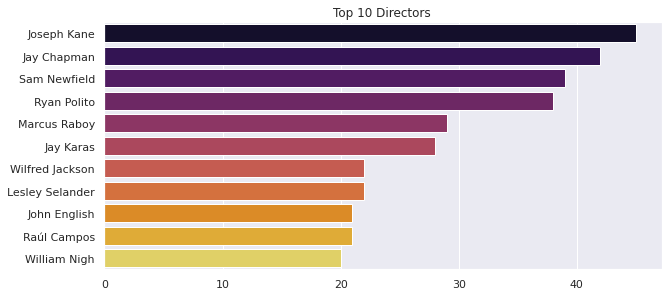

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



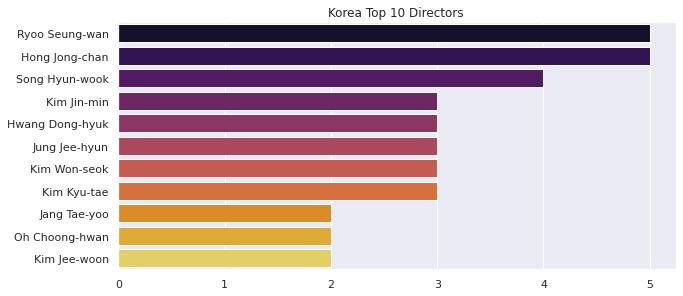

In [ ]:
# Top 10 director (World / Korea)
plt.subplot(211)

fig_director= df_cre_dir['name'].value_counts()[:11].to_frame()
sns.barplot(fig_director['name'],fig_director.index,palette='inferno')
plt.title('Top 10 Directors ')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()


plt.subplot(212)

temp_df = df_cre_dir[df_cre_dir['new_production_countries']=='KR']

fig_director_kor= temp_df['name'].value_counts()[:11].to_frame()
sns.barplot(fig_director_kor['name'],fig_director_kor.index,palette='inferno')
plt.title('Korea Top 10 Directors ')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



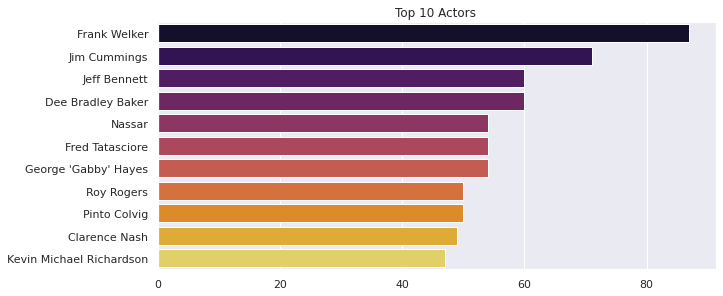

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



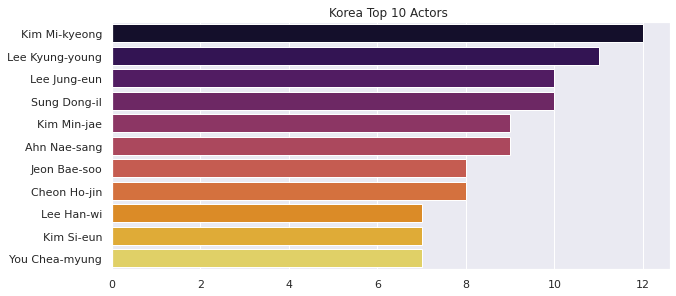

In [ ]:
# Top 10 actor (World / Korea)
plt.subplot(211)
fig_actor= df_cre_act['name'].value_counts()[:11].to_frame()
sns.barplot(fig_actor['name'],fig_actor.index,palette='inferno')
plt.title('Top 10 Actors ')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

plt.subplot(212)
temp_df2 = df_cre_act[df_cre_act['new_production_countries']=='KR']

fig_actor2= temp_df2['name'].value_counts()[:11].to_frame()
sns.barplot(fig_actor2['name'],fig_actor2.index,palette='inferno')
plt.title('Korea Top 10 Actors ')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

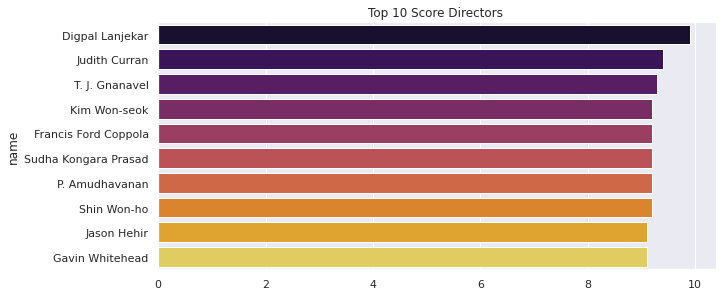

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54728 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50980 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47924 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 54728 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 50980 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 47924 missing from current font.



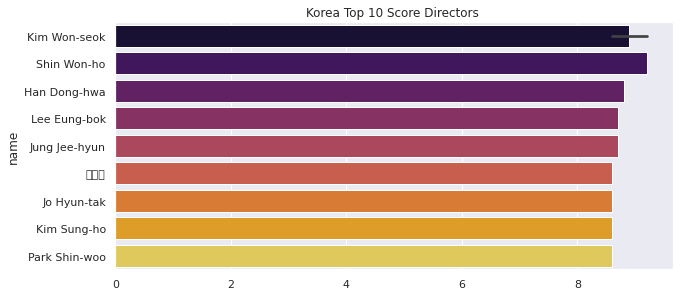

In [ ]:
# Top 10 score director (World / Korea)

plt.subplot(211)
fig_director_score= df_cre_dir.sort_values("imdb_score", ascending=False).head(10)
sns.barplot(x=fig_director_score['imdb_score'],y=fig_director_score['name'], palette='inferno')
plt.title('Top 10 Score Directors ')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

plt.subplot(212)
fig_director_score_kr= temp_df.sort_values(by='imdb_score', ascending=False).head(10)
sns.barplot(x=fig_director_score_kr['imdb_score'],y=fig_director_score_kr['name'], palette='inferno')
plt.title('Korea Top 10 Score Directors ')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()


In [ ]:
#High score movie data - eda

condition = (df_cre_dir.imdb_score > 7.8) & (df_cre_dir.tmdb_score > 8.0)
df_high = df_cre_dir[condition]

condition2 = (df_cre_act.imdb_score > 7.8) & (df_cre_act.tmdb_score > 8.0)
df_high2 = df_cre_act[condition2]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



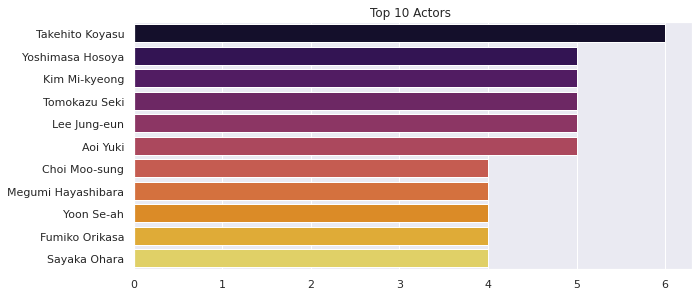

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



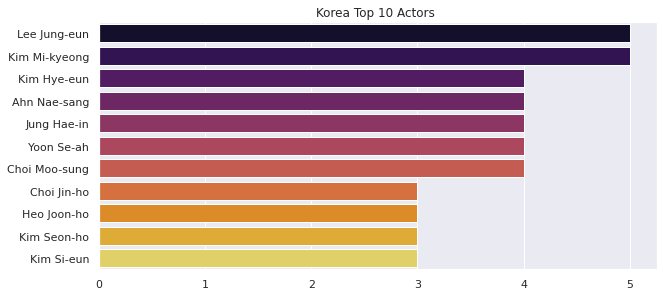

In [ ]:
# Top 10 actor in high score (World / Korea)
plt.subplot(211)
fig_actor= df_high2['name'].value_counts()[:11].to_frame()
sns.barplot(fig_actor['name'],fig_actor.index,palette='inferno')
plt.title('Top 10 Actors ')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

plt.subplot(212)
temp_df2 = df_high2[df_high2['new_production_countries']=='KR']

fig_actor2= temp_df2['name'].value_counts()[:11].to_frame()
sns.barplot(fig_actor2['name'],fig_actor2.index,palette='inferno')
plt.title('Korea Top 10 Actors ')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

### `Recommendation System` 


In [ ]:
import json

In [ ]:
meta = pd.read_csv("/content/drive/MyDrive/archive-2/movies_metadata.csv")
ratings = pd.read_csv("/content/drive/MyDrive/archive-2/ratings_small.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
meta = meta[['id', 'original_title', 'original_language', 'genres']]
meta = meta.rename(columns={'id':'movieId'})
meta = meta[meta['original_language'] == 'en']
meta.head()

movieId               original_title original_language  \
0     862                    Toy Story                en   
1    8844                      Jumanji                en   
2   15602             Grumpier Old Men                en   
3   31357            Waiting to Exhale                en   
4   11862  Father of the Bride Part II                en   

                                              genres  
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...  
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...  
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...  
4                     [{'id': 35, 'name': 'Comedy'}]

In [ ]:
ratings = ratings[['userId', 'movieId', 'rating']]
ratings.head()

userId  movieId  rating
0       1       31     2.5
1       1     1029     3.0
2       1     1061     3.0
3       1     1129     2.0
4       1     1172     4.0

In [ ]:
ratings.describe()

userId        movieId         rating
count  100004.000000  100004.000000  100004.000000
mean      347.011310   12548.664363       3.543608
std       195.163838   26369.198969       1.058064
min         1.000000       1.000000       0.500000
25%       182.000000    1028.000000       3.000000
50%       367.000000    2406.500000       4.000000
75%       520.000000    5418.000000       4.000000
max       671.000000  163949.000000       5.000000

In [ ]:
meta.movieId = pd.to_numeric(meta.movieId, errors='coerce')
ratings.movieId = pd.to_numeric(ratings.movieId, errors='coerce')

In [ ]:
def parse_genres(genres_str):
    genres = json.loads(genres_str.replace('\'', '"'))
    
    genres_list = []
    for g in genres:
        genres_list.append(g['name'])
    return genres_list

meta['genres'] = meta['genres'].apply(parse_genres)
meta.head()

movieId               original_title original_language  \
0      862                    Toy Story                en   
1     8844                      Jumanji                en   
2    15602             Grumpier Old Men                en   
3    31357            Waiting to Exhale                en   
4    11862  Father of the Bride Part II                en   

                         genres  
0   [Animation, Comedy, Family]  
1  [Adventure, Fantasy, Family]  
2             [Romance, Comedy]  
3      [Comedy, Drama, Romance]  
4                      [Comedy]

In [ ]:
data = pd.merge(ratings, meta, on='movieId', how='inner')
data.head()

userId  movieId  rating original_title original_language   genres
0       1     1371     2.5      Rocky III                en  [Drama]
1       4     1371     4.0      Rocky III                en  [Drama]
2       7     1371     3.0      Rocky III                en  [Drama]
3      19     1371     4.0      Rocky III                en  [Drama]
4      21     1371     3.0      Rocky III                en  [Drama]

In [ ]:
matrix = data.pivot_table(index='userId', columns='original_title', values='rating')
matrix.head()

original_title  !Women Art Revolution  'Gator Bait  \
userId                                               
1                                 NaN          NaN   
2                                 NaN          NaN   
3                                 NaN          NaN   
4                                 NaN          NaN   
5                                 NaN          NaN   

original_title  'Twas the Night Before Christmas  10 Items or Less  \
userId                                                               
1                                            NaN               NaN   
2                                            NaN               NaN   
3                                            NaN               NaN   
4                                            NaN               NaN   
5                                            NaN               NaN   

original_title  10 Things I Hate About You  10,000 BC  \
userId                                                  
1                                      NaN        NaN   
2                                      NaN        NaN   
3                                      NaN        NaN   
4                                      NaN        NaN   
5                                      NaN        NaN   

original_title  11'09''01 - September 11  12 + 1  12 Angry Men  1408  ...  \
userId                                                                ...   
1                                    NaN     NaN           NaN   NaN  ...   
2                                    NaN     NaN           NaN   NaN  ...   
3                                    NaN     NaN           NaN   NaN  ...   
4                                    NaN     NaN           NaN   NaN  ...   
5                                    NaN     NaN           NaN   NaN  ...   

original_title  Young and Innocent  Zaat  Zabriskie Point  Zapped Again!  \
userId                                                                     
1                              NaN   NaN              NaN            NaN   
2                              NaN   NaN              NaN            NaN   
3                              3.5   NaN              NaN            NaN   
4                              NaN   NaN              NaN            NaN   
5                              3.5   NaN              NaN            NaN   

original_title  Zardoz  Zodiac  eXistenZ  xXx  ¡Three Amigos!  \
userId                                                          
1                  NaN     NaN       NaN  NaN             NaN   
2                  NaN     NaN       NaN  NaN             NaN   
3                  NaN     NaN       NaN  NaN             NaN   
4                  NaN     NaN       NaN  NaN             NaN   
5                  NaN     NaN       NaN  NaN             NaN   

original_title  Мой сводный брат Франкенштейн  
userId                                         
1                                         NaN  
2                                         NaN  
3                                         NaN  
4                                         NaN  
5                                         NaN  

[5 rows x 2034 columns]

In [ ]:
GENRE_WEIGHT = 0.1

def pearsonR(s1, s2):
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))

def recommend(input_movie, matrix, n, similar_genre=True):
    input_genres = meta[meta['original_title'] == input_movie]['genres'].iloc(0)[0]
    result = []
    for title in matrix.columns:
        if title == input_movie:
            continue
        # rating comparison
        cor = pearsonR(matrix[input_movie], matrix[title])
        # genre comparison
        if similar_genre and len(input_genres) > 0:
            temp_genres = meta[meta['original_title'] == title]['genres'].iloc(0)[0]
            same_count = np.sum(np.isin(input_genres, temp_genres))
            cor += (GENRE_WEIGHT * same_count)
        if np.isnan(cor):
            continue
        else:
            result.append((title, '{:.2f}'.format(cor), temp_genres))
            
    result.sort(key=lambda r: r[1], reverse=True)
    return result[:n]

In [ ]:
recommend_result = recommend('Prom Night', matrix, 10, similar_genre=True)

pd.DataFrame(recommend_result, columns = ['Title', 'Correlation', 'Genre'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in double_scalars



Title Correlation  \
0                           Wild Wild West        1.00   
1                           Population 436        0.88   
2                          The Dark Knight        0.87   
3  Midnight in the Garden of Good and Evil        0.77   
4                             The Sentinel        0.75   
5                                 Godzilla        0.73   
6                   Deadlier Than the Male        0.68   
7                      A Kiss Before Dying        0.61   
8                              Bushwhacked        0.61   
9                  Wet Hot American Summer        0.61   

                                               Genre  
0  [Action, Adventure, Comedy, Science Fiction, W...  
1                 [Drama, Horror, Mystery, Thriller]  
2                   [Drama, Action, Crime, Thriller]  
3                  [Crime, Drama, Mystery, Thriller]  
4                           [Horror, Drama, Mystery]  
5                [Science Fiction, Action, Thriller]  
6                         [Action, Comedy, Thriller]  
7         [Drama, Thriller, Crime, Mystery, Romance]  
8         [Adventure, Action, Comedy, Crime, Family]  
9                                           [Comedy]